In [300]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

#from category_encoders import TargetEncoder
!pip install category_encoders

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import PredictionErrorDisplay


In [301]:
car_sale_df=pd.read_csv("/content/adverts (3).csv")

In [302]:
car_sale_df.head(10)

public_reference   mileage reg_code standard_colour  standard_make  \
0   202006039777689       0.0      NaN            Grey          Volvo   
1   202007020778260  108230.0       61            Blue         Jaguar   
2   202007020778474    7800.0       17            Grey          SKODA   
3   202007080986776   45000.0       16           Brown       Vauxhall   
4   202007161321269   64000.0       64            Grey     Land Rover   
5   202009304412074   16000.0       17            Blue           Audi   
6   202007080998445   24075.0       17             Red       Vauxhall   
7   202009244143980   99000.0       13          Bronze     Land Rover   
8   202010014442611  111236.0       08           Black  Mercedes-Benz   
9   202006230431327    9500.0       19           White     Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   
5                 S5              USED                2017.0  29000   
6               Viva              USED                2017.0   5861   
7        Range Rover              USED                2013.0  24475   
8            S Class              USED                2008.0   6995   
9        Range Rover              USED                2019.0  79995   

     body_type  crossover_car_and_van              fuel_type  
0          SUV                  False  Petrol Plug-in Hybrid  
1       Saloon                  False                 Diesel  
2          SUV                  False                 Petrol  
3    Hatchback                  False                 Diesel  
4          SUV                  False                 Diesel  
5  Convertible                  False                 Petrol  
6    Hatchback                  False                 Petrol  
7          SUV                  False                 Diesel  
8    Limousine                  False                 Diesel  
9          SUV                  False                 Diesel

In [303]:
car_sale_df.sample(10)

public_reference   mileage reg_code standard_colour standard_make  \
16087    202007070976491   92000.0       57            Grey        Toyota   
366993   202010205205465   39000.0       65           White        Suzuki   
38007    202008092277201  100000.0       60           Black       Citroen   
238544   202010054637646   50000.0       63           Black           Kia   
183728   202010165067495   32288.0       17          Silver          SEAT   
211269   202006160174081  105000.0       56           Black          Fiat   
193545   202010155040894   25180.0       15           White    Volkswagen   
162928   202010134948270   42741.0       65             Red      Vauxhall   
313571   202010315634401       0.0       70            Grey         Volvo   
369332   202010245381829    6300.0       69           Black       Porsche   

       standard_model vehicle_condition  year_of_registration  price  \
16087           Auris              USED                2008.0   2489   
366993          Swift              USED                2015.0   5800   
38007             DS3              USED                2011.0   2795   
238544          Venga              USED                2013.0   4375   
183728          Ateca              USED                2017.0  16290   
211269   Grande Punto              USED                2006.0    999   
193545         Beetle              USED                2015.0   9995   
162928          Corsa              USED                2015.0   6000   
313571           XC60              USED                   NaN  41980   
369332     718 Cayman              USED                2019.0  50750   

        body_type  crossover_car_and_van fuel_type  
16087   Hatchback                  False    Petrol  
366993  Hatchback                  False    Petrol  
38007   Hatchback                  False    Diesel  
238544  Hatchback                  False    Petrol  
183728        SUV                  False    Petrol  
211269  Hatchback                  False    Petrol  
193545  Hatchback                  False    Petrol  
162928  Hatchback                  False    Petrol  
313571        SUV                  False       NaN  
369332      Coupe                  False    Petrol

In [304]:
car_sale_df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [305]:
car_sale_df.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [306]:
car_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [307]:
car_sale_df.size

4824060

In [308]:
car_sale_df.shape

(402005, 12)

In [309]:
car_sale_df.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

In [310]:
car_sale_df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [311]:
df=car_sale_df.sample(50000)
df

public_reference   mileage reg_code standard_colour standard_make  \
239884   202009173857134    8073.0       69           White       Peugeot   
97460    202008172610846   23200.0       17          Silver      Vauxhall   
364103   202006220391782  153000.0       61          Silver           BMW   
187465   202010155041169   59000.0       59          Silver        Nissan   
351210   202010205221475       0.0      NaN           White           BMW   
...                  ...       ...      ...             ...           ...   
372963   202010134952994   18552.0       68           White    Volkswagen   
160159   202010064651458   73315.0       13             Red        Nissan   
34150    202010094813311   73770.0       13          Silver           Kia   
5273     202010074692841   30750.0       17            Blue         Volvo   
152062   202010165069609   12770.0       58           Black         Honda   

       standard_model vehicle_condition  year_of_registration  price  \
239884            308              USED                2019.0  21042   
97460        Insignia              USED                2017.0   7900   
364103             X3              USED                2011.0   5995   
187465        Qashqai              USED                2009.0   5495   
351210             X6               NEW                   NaN  68927   
...               ...               ...                   ...    ...   
372963         Tiguan              USED                2018.0  28995   
160159        Qashqai              USED                2013.0   6200   
34150        Sportage              USED                2013.0   8699   
5273             XC60              USED                2017.0  18995   
152062          Civic              USED                2008.0   7490   

        body_type  crossover_car_and_van      fuel_type  
239884  Hatchback                  False         Petrol  
97460   Hatchback                  False         Diesel  
364103        SUV                  False         Diesel  
187465  Hatchback                  False         Petrol  
351210        SUV                  False  Diesel Hybrid  
...           ...                    ...            ...  
372963        SUV                  False         Diesel  
160159        SUV                  False         Diesel  
34150         SUV                  False         Diesel  
5273          SUV                  False         Diesel  
152062  Hatchback                  False         Petrol  

[50000 rows x 12 columns]

In [312]:


df['mileage'].describe()

count     49980.000000
mean      37927.810584
std       35019.829847
min           0.000000
25%       10599.500000
50%       28800.000000
75%       57231.000000
max      990000.000000
Name: mileage, dtype: float64

In [313]:
sns.boxplot(data=car_sale_df,x='mileage')

<Axes: xlabel='mileage'>

In [314]:
sns.histplot(data=car_sale_df,x='mileage',kde=True,bins=20)
plt.xticks(rotation=90);

In [315]:

df=car_sale_df.sample(50000)

<Axes: xlabel='mileage'>

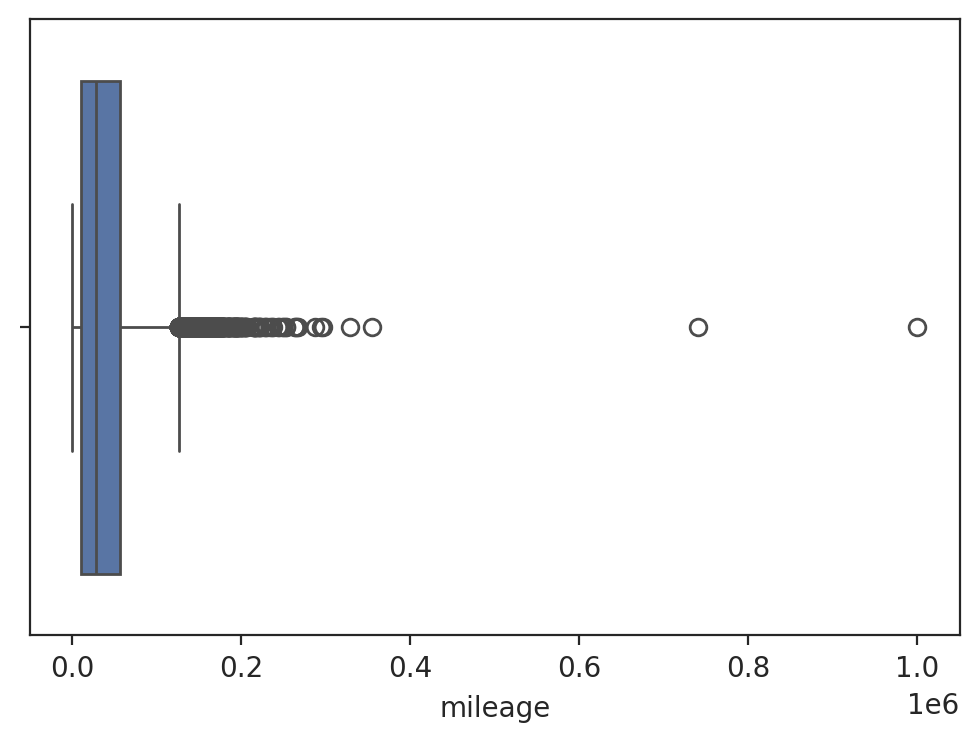

In [316]:


sns.boxplot(data=df,x='mileage')




In [317]:

car_sale_df['reg_code'].describe()

count     370148
unique        72
top           17
freq       36738
Name: reg_code, dtype: object

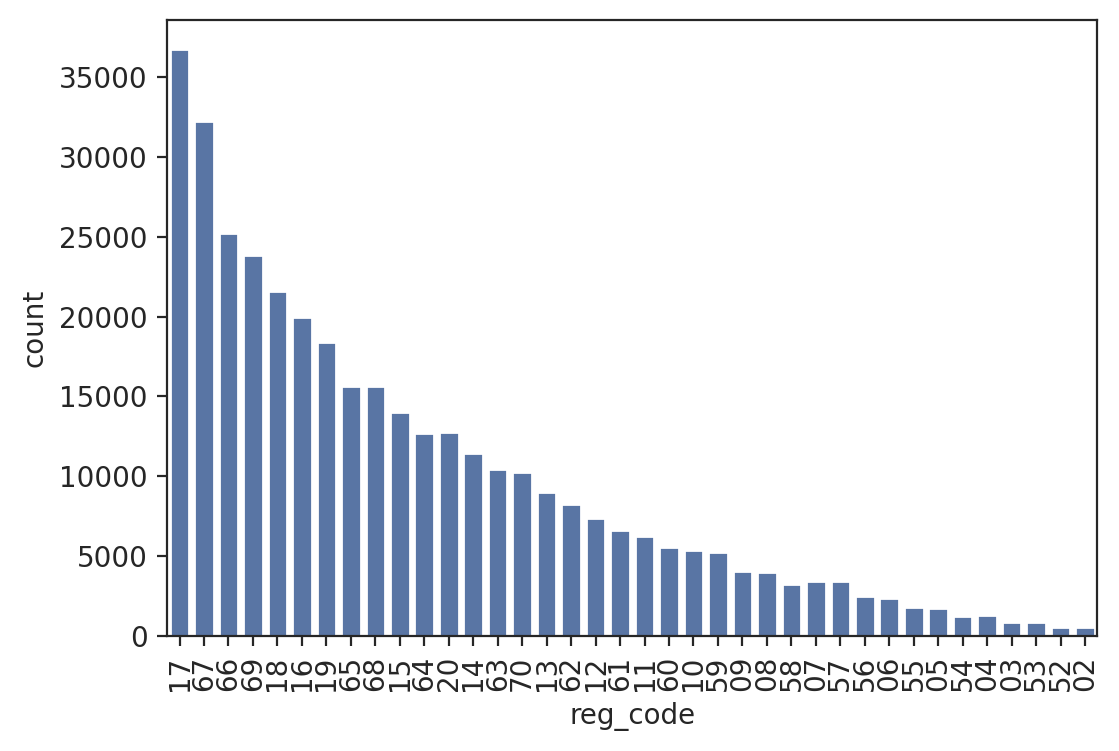

In [318]:

sns.countplot(x='reg_code', data=car_sale_df, order=df['reg_code'].value_counts().iloc[:38].index)
plt.xticks(rotation=90);

In [319]:
car_sale_df['standard_colour'].value_counts()

standard_colour
Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: count, dtype: int64

In [320]:
car_sale_df['standard_colour'].value_counts().plot.bar()

<Axes: xlabel='standard_colour'>

In [321]:
car_sale_df['standard_make'].value_counts()

standard_make
BMW               37376
Audi              35280
Volkswagen        34246
Vauxhall          33700
Mercedes-Benz     31917
                  ...  
Bristol               1
Wolseley              1
Pagani                1
International         1
Custom Vehicle        1
Name: count, Length: 110, dtype: int64

In [322]:

sns.countplot(x='standard_make', data=car_sale_df, order=df['standard_make'].value_counts().iloc[:20].index)
plt.xticks(rotation=90);



In [323]:
df['vehicle_condition'].value_counts()

vehicle_condition
USED    46108
NEW      3892
Name: count, dtype: int64

In [324]:
car_sale_df['vehicle_condition'].value_counts().plot.bar()

<Axes: xlabel='vehicle_condition'>

In [325]:
car_sale_df['year_of_registration'].describe()

count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

<Axes: xlabel='year_of_registration', ylabel='Count'>

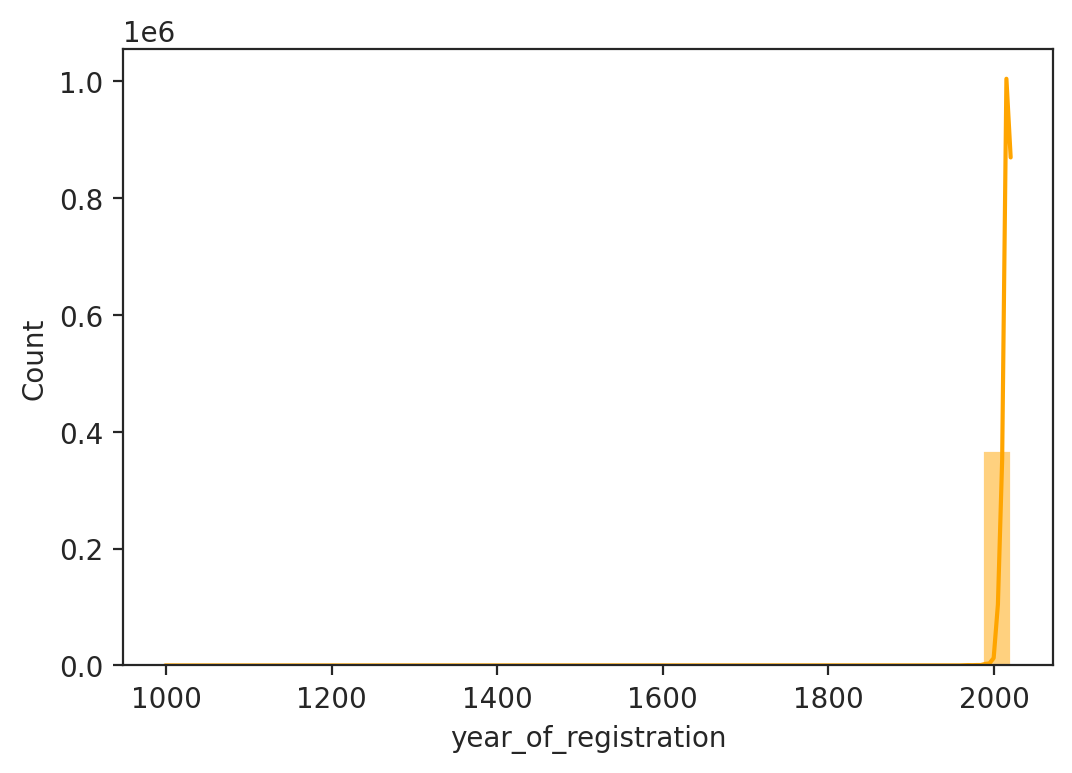

In [326]:
sns.histplot(car_sale_df['year_of_registration'], bins=30, kde=True, color='orange')

In [327]:
car_sale_df['price'].describe().astype(int)

count     402005
mean       17341
std        46437
min          120
25%         7495
50%        12600
75%        20000
max      9999999
Name: price, dtype: int64

<Axes: xlabel='price'>

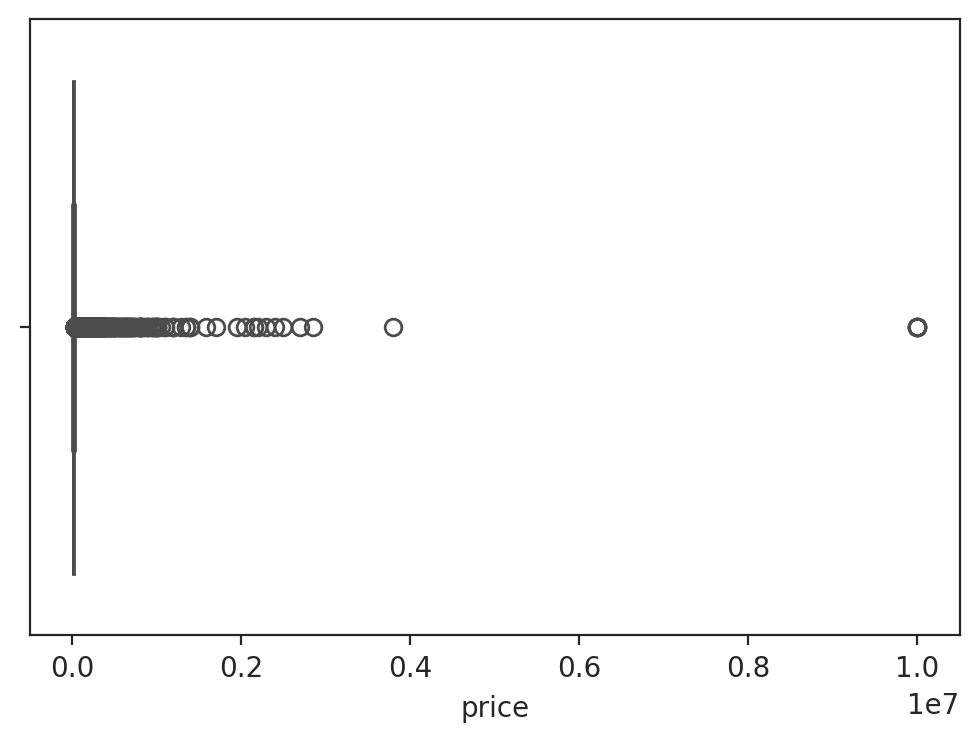

In [328]:
sns.boxplot(data=car_sale_df,x='price')

In [329]:
car_sale_df['body_type'].value_counts()

body_type
Hatchback          167315
SUV                115872
Saloon              36641
Estate              24692
Coupe               23258
Convertible         16038
MPV                 16026
Pickup                620
Combi Van             214
Limousine             159
Minibus               149
Camper                 77
Panel Van              61
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: count, dtype: int64

<Axes: xlabel='body_type'>

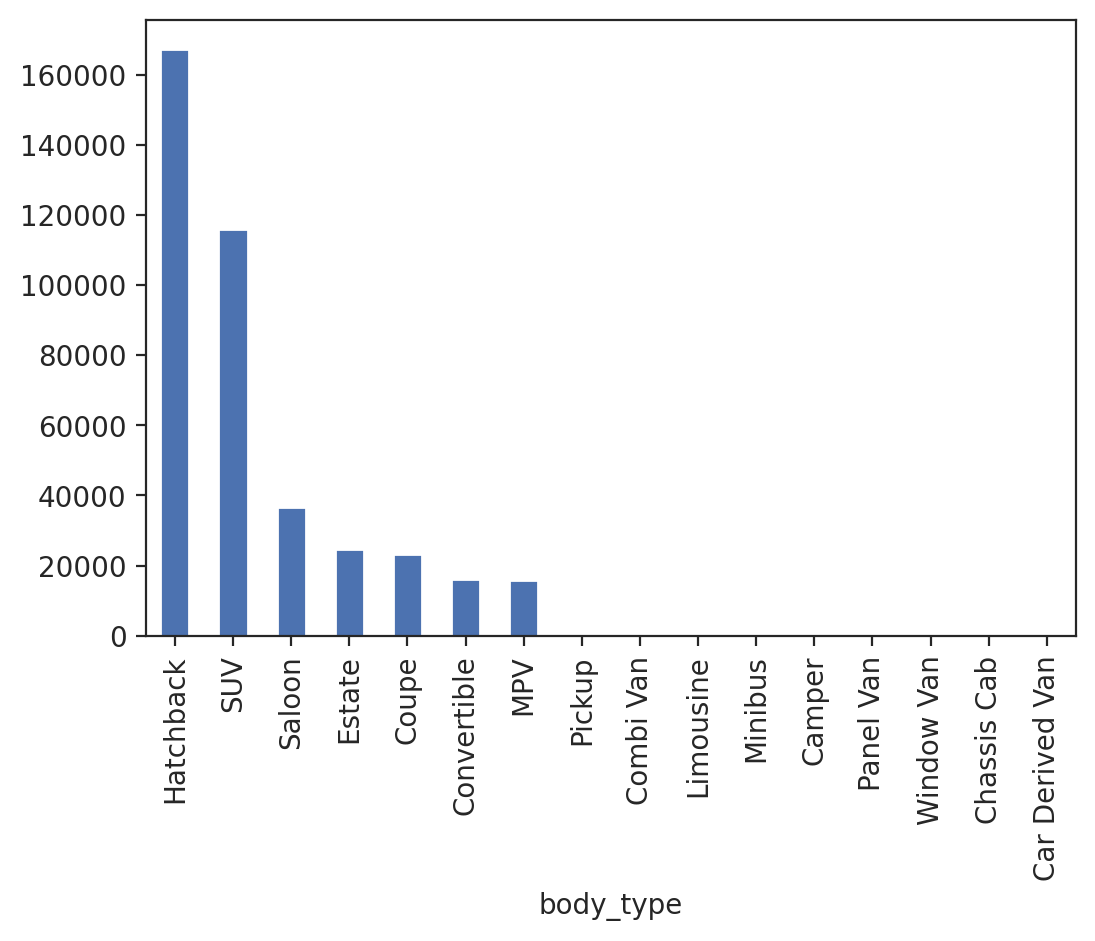

In [330]:
car_sale_df['body_type'].value_counts().plot.bar()

In [331]:
car_sale_df['crossover_car_and_van'].value_counts()

crossover_car_and_van
False    400210
True       1795
Name: count, dtype: int64

In [332]:
car_sale_df['fuel_type'].value_counts()

fuel_type
Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: count, dtype: int64

Text(0.5, 1.0, 'Type_of_Fuel')

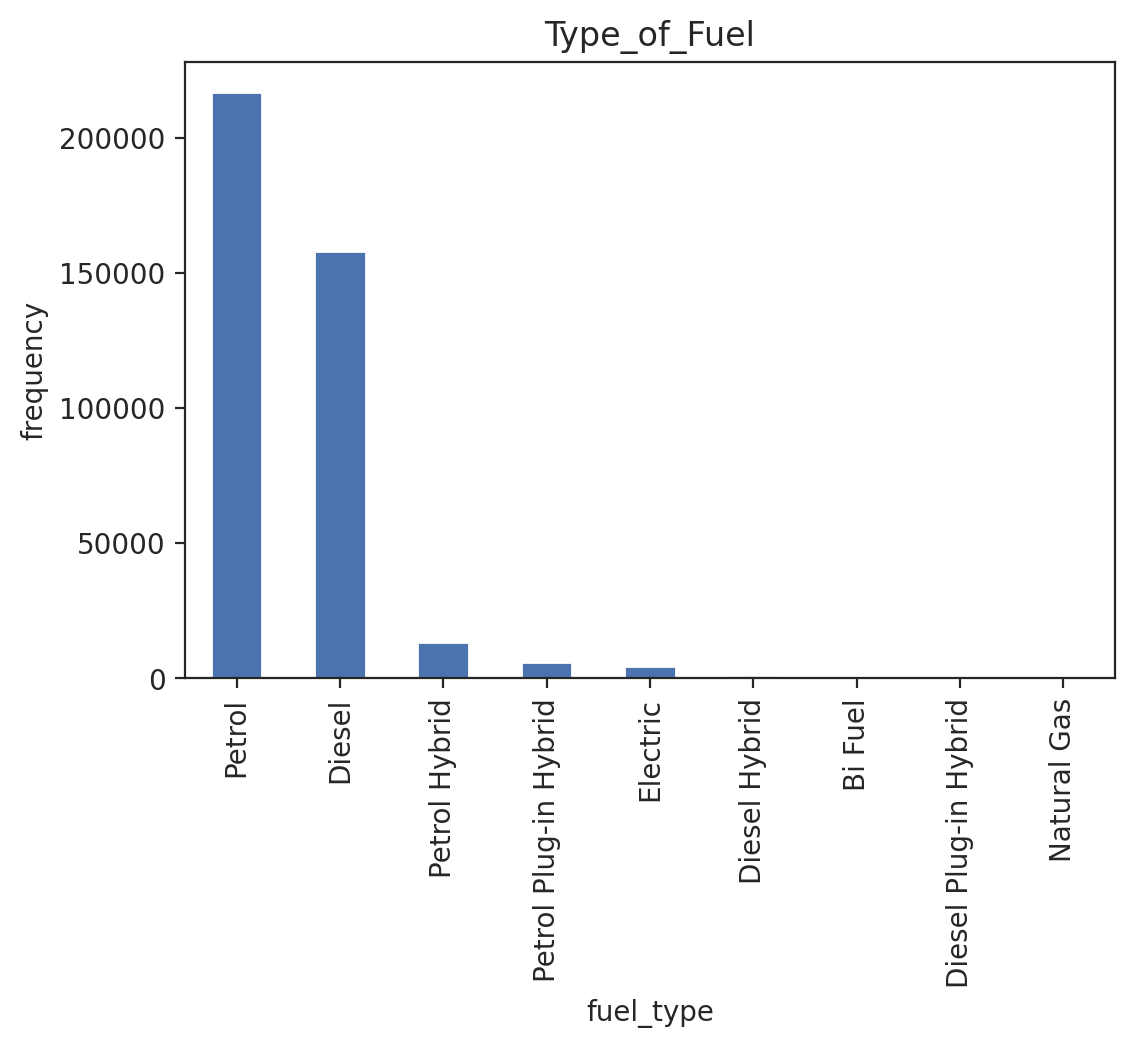

In [333]:
car_sale_df['fuel_type'].value_counts().plot.bar()
plt.xlabel('fuel_type')
plt.ylabel('frequency')
plt.title('Type_of_Fuel')

# 1.3 data processing for exploration and visualization

In [334]:
car_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [335]:
car_sale_df['year_of_registration'].describe()

count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

In [336]:

cse=car_sale_df[car_sale_df['year_of_registration']>2000]['year_of_registration']

cse

1         2011.0
2         2017.0
3         2016.0
4         2015.0
5         2017.0
           ...  
402000    2019.0
402001    2009.0
402002    2012.0
402003    2015.0
402004    2014.0
Name: year_of_registration, Length: 366163, dtype: float64

In [337]:
sns.boxplot(cse);

In [338]:
car_sale_df['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

In [339]:

filtered_data = df[df["mileage"]<150000]["mileage"]
filtered_data

92915      90601.0
151413     58171.0
277176     54517.0
350827      9148.0
341422     85000.0
            ...   
135564     43663.0
334447     87000.0
91439     107000.0
282348     47390.0
6511      120000.0
Name: mileage, Length: 49637, dtype: float64

<Axes: ylabel='mileage'>

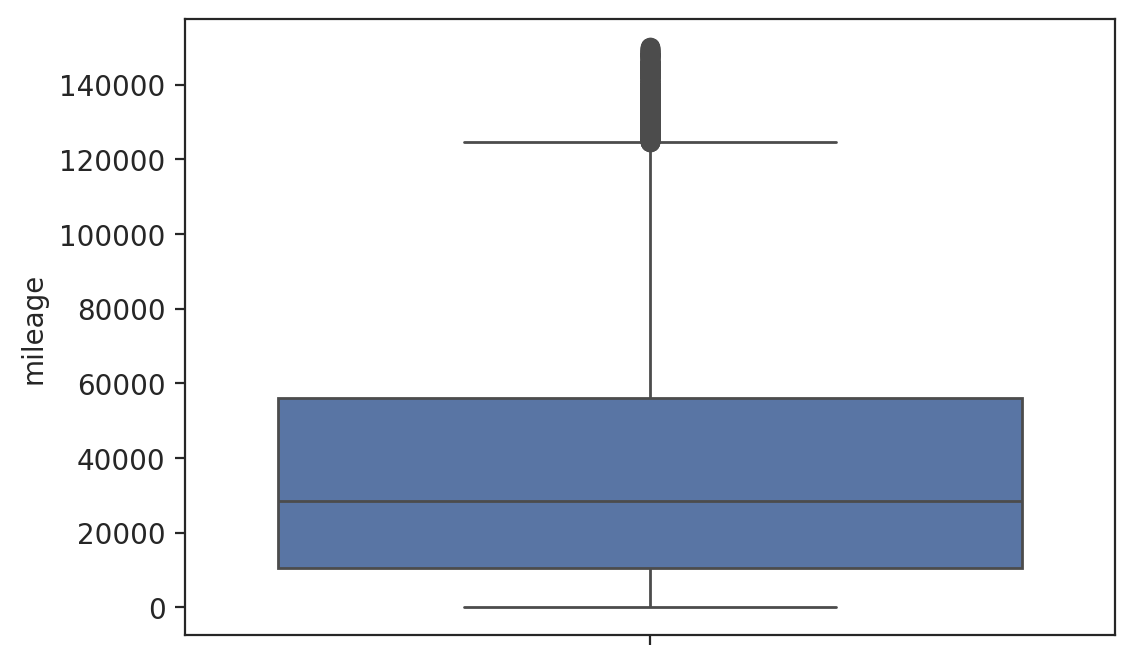

In [340]:
sns.boxplot(filtered_data)

In [341]:
car_sale_df['price'].describe()

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64

In [342]:

out=car_sale_df[car_sale_df['price'] < 50000]['price']

out

1          7000
2         14000
3          7995
4         26995
5         29000
          ...  
402000    10595
402001     2000
402002     7250
402003    11490
402004    20520
Name: price, Length: 386834, dtype: int64

<Axes: ylabel='price'>

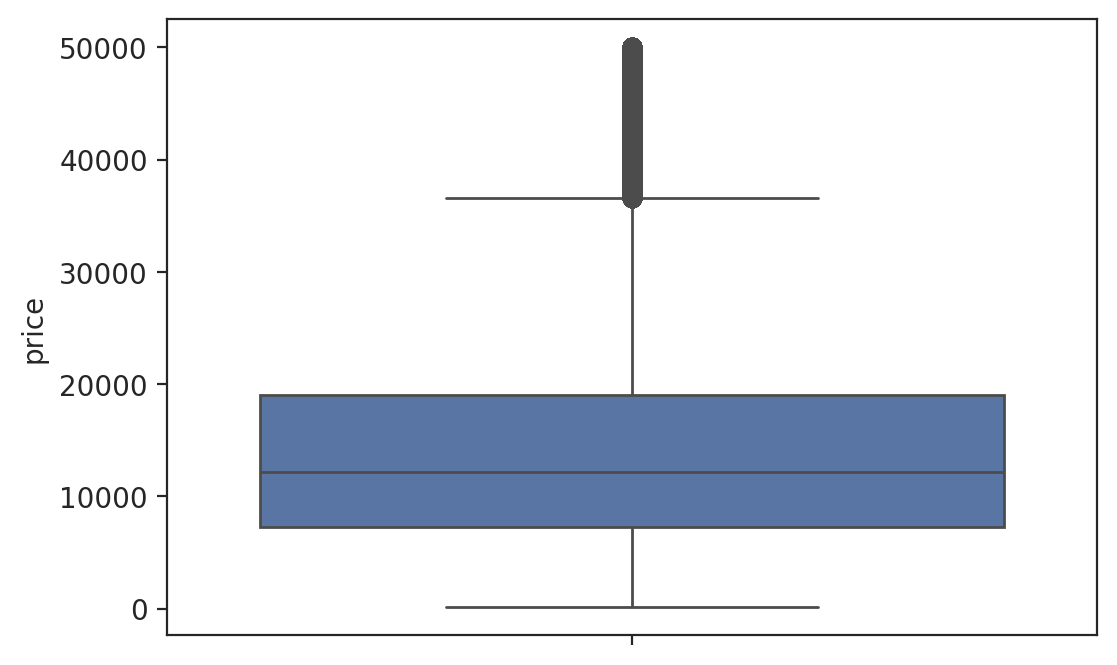

In [343]:
sns.boxplot(out)

In [344]:
fd=car_sale_df.loc[car_sale_df["fuel_type"]=='Diesel']
fd

public_reference   mileage reg_code standard_colour  standard_make  \
1        202007020778260  108230.0       61            Blue         Jaguar   
3        202007080986776   45000.0       16           Brown       Vauxhall   
4        202007161321269   64000.0       64            Grey     Land Rover   
7        202009244143980   99000.0       13          Bronze     Land Rover   
8        202010014442611  111236.0       08           Black  Mercedes-Benz   
...                  ...       ...      ...             ...            ...   
401985   202010305595696   42377.0       17           White          Mazda   
401986   202010305596860    2334.0       69           White     Land Rover   
401987   202010305606380    8437.0       18            Grey          Volvo   
401988   202010305606692   99784.0       61           Black           Audi   
402004   201512149444029   14000.0       14          Silver           Audi   

           standard_model vehicle_condition  year_of_registration  price  \
1                      XF              USED                2011.0   7000   
3                   Mokka              USED                2016.0   7995   
4       Range Rover Sport              USED                2015.0  26995   
7             Range Rover              USED                2013.0  24475   
8                 S Class              USED                2008.0   6995   
...                   ...               ...                   ...    ...   
401985               CX-5              USED                2017.0  17900   
401986  Range Rover Velar              USED                2019.0  42480   
401987               XC90              USED                2018.0  40000   
401988                 Q5              USED                2011.0   8999   
402004           A4 Avant              USED                2014.0  20520   

        body_type  crossover_car_and_van fuel_type  
1          Saloon                  False    Diesel  
3       Hatchback                  False    Diesel  
4             SUV                  False    Diesel  
7             SUV                  False    Diesel  
8       Limousine                  False    Diesel  
...           ...                    ...       ...  
401985        SUV                  False    Diesel  
401986        SUV                  False    Diesel  
401987        SUV                  False    Diesel  
401988        SUV                  False    Diesel  
402004     Estate                  False    Diesel  

[158120 rows x 12 columns]

# data processing for machine learning

In [345]:
car_sale_df['mileage'].isna().sum()

127

In [346]:
car_sale_df = car_sale_df.set_axis(['reference', 'mileage', 'reg_code', 'color','make', 'model', 'veh_condition', 'year_regist','price', 'body_type', 'crsovr_car_van', 'fuel_type'], axis='columns')

In [347]:
#dealing with outliers in mileage column
q1=car_sale_df.mileage.quantile(0.25)
q3=car_sale_df.mileage.quantile(0.75)
iqr=q3-q1
iqr

46394.75

In [348]:
car_sale_df=car_sale_df[~((car_sale_df.mileage < (q1 - 1.5 * iqr)) | (car_sale_df.mileage > (q3 + 1.5 * iqr)))]

In [349]:
car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0      NaN    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW          NaN  73970        SUV   
1                      XF          USED       2011.0   7000     Saloon   
2                    Yeti          USED       2017.0  14000        SUV   
3                   Mokka          USED       2016.0   7995  Hatchback   
4       Range Rover Sport          USED       2015.0  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED       2019.0  10595  Hatchback   
402001                107          USED       2009.0   2000  Hatchback   
402002            Qashqai          USED       2012.0   7250        SUV   
402003                595          USED       2015.0  11490  Hatchback   
402004           A4 Avant          USED       2014.0  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[393824 rows x 12 columns]

In [350]:
sns.boxplot(data=car_sale_df,x='mileage')

<Axes: xlabel='mileage'>

In [351]:
car_sale_df=car_sale_df[car_sale_df['mileage']< 120000]
car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0      NaN    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW          NaN  73970        SUV   
1                      XF          USED       2011.0   7000     Saloon   
2                    Yeti          USED       2017.0  14000        SUV   
3                   Mokka          USED       2016.0   7995  Hatchback   
4       Range Rover Sport          USED       2015.0  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED       2019.0  10595  Hatchback   
402001                107          USED       2009.0   2000  Hatchback   
402002            Qashqai          USED       2012.0   7250        SUV   
402003                595          USED       2015.0  11490  Hatchback   
402004           A4 Avant          USED       2014.0  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[390748 rows x 12 columns]

In [352]:

sns.boxplot(data=car_sale_df,x='mileage')

<Axes: xlabel='mileage'>

In [353]:
car_sale_df['mileage'].isna().sum()

0

In [354]:
car_sale_df['mileage']=car_sale_df['mileage'].fillna(car_sale_df['mileage'].mean())

car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0      NaN    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW          NaN  73970        SUV   
1                      XF          USED       2011.0   7000     Saloon   
2                    Yeti          USED       2017.0  14000        SUV   
3                   Mokka          USED       2016.0   7995  Hatchback   
4       Range Rover Sport          USED       2015.0  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED       2019.0  10595  Hatchback   
402001                107          USED       2009.0   2000  Hatchback   
402002            Qashqai          USED       2012.0   7250        SUV   
402003                595          USED       2015.0  11490  Hatchback   
402004           A4 Avant          USED       2014.0  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[390748 rows x 12 columns]

In [355]:
#finding outliers in year_of_registration_column
car_sale_df['year_regist'].describe()

count    357488.000000
mean       2015.221823
std           7.946013
min         999.000000
25%        2014.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_regist, dtype: float64

In [356]:
q1=car_sale_df.year_regist.quantile(0.25)
q3=car_sale_df.year_regist.quantile(0.75)
iqr=q3-q1
iqr

4.0

In [357]:

car_sale_df=car_sale_df[~((car_sale_df.year_regist < (q1 - 1.5 * iqr)) | (car_sale_df.year_regist > (q3 + 1.5 * iqr)))]

In [358]:
car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0      NaN    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW          NaN  73970        SUV   
1                      XF          USED       2011.0   7000     Saloon   
2                    Yeti          USED       2017.0  14000        SUV   
3                   Mokka          USED       2016.0   7995  Hatchback   
4       Range Rover Sport          USED       2015.0  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED       2019.0  10595  Hatchback   
402001                107          USED       2009.0   2000  Hatchback   
402002            Qashqai          USED       2012.0   7250        SUV   
402003                595          USED       2015.0  11490  Hatchback   
402004           A4 Avant          USED       2014.0  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[372157 rows x 12 columns]

In [359]:

sns.boxplot(data=car_sale_df,x='year_regist')

<Axes: xlabel='year_regist'>

In [360]:
#finding missing values in year_of_registration column
car_sale_df['year_regist'].isna().sum()

33260

In [361]:

car_sale_df['year_regist']=car_sale_df['year_regist'].fillna(car_sale_df['year_regist'].mean())

car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0      NaN    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW  2015.895844  73970        SUV   
1                      XF          USED  2011.000000   7000     Saloon   
2                    Yeti          USED  2017.000000  14000        SUV   
3                   Mokka          USED  2016.000000   7995  Hatchback   
4       Range Rover Sport          USED  2015.000000  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED  2019.000000  10595  Hatchback   
402001                107          USED  2009.000000   2000  Hatchback   
402002            Qashqai          USED  2012.000000   7250        SUV   
402003                595          USED  2015.000000  11490  Hatchback   
402004           A4 Avant          USED  2014.000000  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[372157 rows x 12 columns]

In [362]:
car_sale_df['year_regist'].isna().sum()

0

In [363]:
car_sale_df['year_regist']=car_sale_df['year_regist'].astype(int)
car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0      NaN    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW         2015  73970        SUV   
1                      XF          USED         2011   7000     Saloon   
2                    Yeti          USED         2017  14000        SUV   
3                   Mokka          USED         2016   7995  Hatchback   
4       Range Rover Sport          USED         2015  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED         2019  10595  Hatchback   
402001                107          USED         2009   2000  Hatchback   
402002            Qashqai          USED         2012   7250        SUV   
402003                595          USED         2015  11490  Hatchback   
402004           A4 Avant          USED         2014  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[372157 rows x 12 columns]

In [364]:
#fillling missing values in reg_code column
car_sale_df['reg_code'].isna().sum()

31699

In [365]:
car_sale_df['reg_code'].describe()

count     340458
unique        64
top           17
freq       36669
Name: reg_code, dtype: object

In [366]:
car_sale_df['reg_code']=car_sale_df['reg_code'].fillna(car_sale_df['reg_code'].mode()[0])
car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0       17    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW         2015  73970        SUV   
1                      XF          USED         2011   7000     Saloon   
2                    Yeti          USED         2017  14000        SUV   
3                   Mokka          USED         2016   7995  Hatchback   
4       Range Rover Sport          USED         2015  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED         2019  10595  Hatchback   
402001                107          USED         2009   2000  Hatchback   
402002            Qashqai          USED         2012   7250        SUV   
402003                595          USED         2015  11490  Hatchback   
402004           A4 Avant          USED         2014  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[372157 rows x 12 columns]

In [367]:
car_sale_df['reg_code'].isna().sum()

0

In [368]:
#filling missing values in standard colour column
car_sale_df['color'].value_counts()

color
Black          80002
White          69397
Grey           64641
Blue           54311
Silver         40889
Red            39797
Orange          3993
Green           3620
Brown           1964
Yellow          1926
Multicolour     1807
Beige           1298
Bronze          1255
Purple          1118
Gold             622
Pink             402
Turquoise        279
Maroon           127
Burgundy          55
Magenta           15
Navy               5
Indigo             1
Name: count, dtype: int64

In [369]:
car_sale_df['color'].isna().sum()

4633

In [370]:
car_sale_df['color']=car_sale_df['color'].fillna(car_sale_df['color'].mode()[0])
car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0       17    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW         2015  73970        SUV   
1                      XF          USED         2011   7000     Saloon   
2                    Yeti          USED         2017  14000        SUV   
3                   Mokka          USED         2016   7995  Hatchback   
4       Range Rover Sport          USED         2015  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED         2019  10595  Hatchback   
402001                107          USED         2009   2000  Hatchback   
402002            Qashqai          USED         2012   7250        SUV   
402003                595          USED         2015  11490  Hatchback   
402004           A4 Avant          USED         2014  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[372157 rows x 12 columns]

In [371]:
car_sale_df['color'].isna().sum()

0

In [372]:
#filling missing values in body_type
car_sale_df['body_type'].value_counts()

body_type
Hatchback          156302
SUV                112075
Saloon              32368
Estate              22406
Coupe               20493
MPV                 14295
Convertible         12480
Pickup                502
Combi Van             181
Minibus               124
Limousine              88
Camper                 54
Panel Van              48
Window Van             27
Car Derived Van         1
Chassis Cab             1
Name: count, dtype: int64

In [373]:
car_sale_df['body_type'].isna().sum()

712

In [374]:
car_sale_df['body_type']=car_sale_df['body_type'].fillna(car_sale_df['body_type'].mode()[0])
car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0       17    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW         2015  73970        SUV   
1                      XF          USED         2011   7000     Saloon   
2                    Yeti          USED         2017  14000        SUV   
3                   Mokka          USED         2016   7995  Hatchback   
4       Range Rover Sport          USED         2015  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED         2019  10595  Hatchback   
402001                107          USED         2009   2000  Hatchback   
402002            Qashqai          USED         2012   7250        SUV   
402003                595          USED         2015  11490  Hatchback   
402004           A4 Avant          USED         2014  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[372157 rows x 12 columns]

In [375]:
car_sale_df['body_type'].isna().sum()

0

In [376]:
#filling missing values in fuel_type column
car_sale_df['fuel_type'].value_counts()

fuel_type
Petrol                   198383
Diesel                   147312
Petrol Hybrid             13243
Petrol Plug-in Hybrid      6139
Electric                   4779
Diesel Hybrid              1380
Bi Fuel                     212
Diesel Plug-in Hybrid       185
Name: count, dtype: int64

In [377]:
car_sale_df['fuel_type'].isna().sum()

524

In [378]:

car_sale_df['fuel_type']=car_sale_df['fuel_type'].fillna(car_sale_df['fuel_type'].mode()[0])

car_sale_df

reference   mileage reg_code   color        make  \
0       202006039777689       0.0       17    Grey       Volvo   
1       202007020778260  108230.0       61    Blue      Jaguar   
2       202007020778474    7800.0       17    Grey       SKODA   
3       202007080986776   45000.0       16   Brown    Vauxhall   
4       202007161321269   64000.0       64    Grey  Land Rover   
...                 ...       ...      ...     ...         ...   
402000  202010315652942    5179.0       69    Grey     Peugeot   
402001  202010315657341  110000.0       59     Red     Peugeot   
402002  202010315659271   52760.0       62   White      Nissan   
402003  202011015662436   10250.0       65     Red      Abarth   
402004  201512149444029   14000.0       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW         2015  73970        SUV   
1                      XF          USED         2011   7000     Saloon   
2                    Yeti          USED         2017  14000        SUV   
3                   Mokka          USED         2016   7995  Hatchback   
4       Range Rover Sport          USED         2015  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED         2019  10595  Hatchback   
402001                107          USED         2009   2000  Hatchback   
402002            Qashqai          USED         2012   7250        SUV   
402003                595          USED         2015  11490  Hatchback   
402004           A4 Avant          USED         2014  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[372157 rows x 12 columns]

In [379]:
car_sale_df['fuel_type'].isna().sum()

0

In [380]:
car_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372157 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reference       372157 non-null  int64  
 1   mileage         372157 non-null  float64
 2   reg_code        372157 non-null  object 
 3   color           372157 non-null  object 
 4   make            372157 non-null  object 
 5   model           372157 non-null  object 
 6   veh_condition   372157 non-null  object 
 7   year_regist     372157 non-null  int64  
 8   price           372157 non-null  int64  
 9   body_type       372157 non-null  object 
 10  crsovr_car_van  372157 non-null  bool   
 11  fuel_type       372157 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 34.4+ MB


In [381]:
car_sale_df['mileage']=car_sale_df['mileage'].astype(int)
car_sale_df['year_regist']=car_sale_df['year_regist'].astype(int)

In [382]:
car_sale_df

reference  mileage reg_code   color        make  \
0       202006039777689        0       17    Grey       Volvo   
1       202007020778260   108230       61    Blue      Jaguar   
2       202007020778474     7800       17    Grey       SKODA   
3       202007080986776    45000       16   Brown    Vauxhall   
4       202007161321269    64000       64    Grey  Land Rover   
...                 ...      ...      ...     ...         ...   
402000  202010315652942     5179       69    Grey     Peugeot   
402001  202010315657341   110000       59     Red     Peugeot   
402002  202010315659271    52760       62   White      Nissan   
402003  202011015662436    10250       65     Red      Abarth   
402004  201512149444029    14000       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW         2015  73970        SUV   
1                      XF          USED         2011   7000     Saloon   
2                    Yeti          USED         2017  14000        SUV   
3                   Mokka          USED         2016   7995  Hatchback   
4       Range Rover Sport          USED         2015  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED         2019  10595  Hatchback   
402001                107          USED         2009   2000  Hatchback   
402002            Qashqai          USED         2012   7250        SUV   
402003                595          USED         2015  11490  Hatchback   
402004           A4 Avant          USED         2014  20520     Estate   

        crsovr_car_van              fuel_type  
0                False  Petrol Plug-in Hybrid  
1                False                 Diesel  
2                False                 Petrol  
3                False                 Diesel  
4                False                 Diesel  
...                ...                    ...  
402000           False                 Petrol  
402001           False                 Petrol  
402002           False                 Petrol  
402003           False                 Petrol  
402004           False                 Diesel  

[372157 rows x 12 columns]

In [383]:
#deriving new column from the existing year_regist column

car_sale_df['car_age'] = 2024 - car_sale_df['year_regist']

car_sale_df

reference  mileage reg_code   color        make  \
0       202006039777689        0       17    Grey       Volvo   
1       202007020778260   108230       61    Blue      Jaguar   
2       202007020778474     7800       17    Grey       SKODA   
3       202007080986776    45000       16   Brown    Vauxhall   
4       202007161321269    64000       64    Grey  Land Rover   
...                 ...      ...      ...     ...         ...   
402000  202010315652942     5179       69    Grey     Peugeot   
402001  202010315657341   110000       59     Red     Peugeot   
402002  202010315659271    52760       62   White      Nissan   
402003  202011015662436    10250       65     Red      Abarth   
402004  201512149444029    14000       14  Silver        Audi   

                    model veh_condition  year_regist  price  body_type  \
0                    XC90           NEW         2015  73970        SUV   
1                      XF          USED         2011   7000     Saloon   
2                    Yeti          USED         2017  14000        SUV   
3                   Mokka          USED         2016   7995  Hatchback   
4       Range Rover Sport          USED         2015  26995        SUV   
...                   ...           ...          ...    ...        ...   
402000                208          USED         2019  10595  Hatchback   
402001                107          USED         2009   2000  Hatchback   
402002            Qashqai          USED         2012   7250        SUV   
402003                595          USED         2015  11490  Hatchback   
402004           A4 Avant          USED         2014  20520     Estate   

        crsovr_car_van              fuel_type  car_age  
0                False  Petrol Plug-in Hybrid        9  
1                False                 Diesel       13  
2                False                 Petrol        7  
3                False                 Diesel        8  
4                False                 Diesel        9  
...                ...                    ...      ...  
402000           False                 Petrol        5  
402001           False                 Petrol       15  
402002           False                 Petrol       12  
402003           False                 Petrol        9  
402004           False                 Diesel       10  

[372157 rows x 13 columns]

In [384]:
#dropping unnecessary columns from the dataframe

car_sale_df=car_sale_df.drop(columns=[ 'reg_code','crsovr_car_van' ])

car_sale_df

reference  mileage   color        make              model  \
0       202006039777689        0    Grey       Volvo               XC90   
1       202007020778260   108230    Blue      Jaguar                 XF   
2       202007020778474     7800    Grey       SKODA               Yeti   
3       202007080986776    45000   Brown    Vauxhall              Mokka   
4       202007161321269    64000    Grey  Land Rover  Range Rover Sport   
...                 ...      ...     ...         ...                ...   
402000  202010315652942     5179    Grey     Peugeot                208   
402001  202010315657341   110000     Red     Peugeot                107   
402002  202010315659271    52760   White      Nissan            Qashqai   
402003  202011015662436    10250     Red      Abarth                595   
402004  201512149444029    14000  Silver        Audi           A4 Avant   

       veh_condition  year_regist  price  body_type              fuel_type  \
0                NEW         2015  73970        SUV  Petrol Plug-in Hybrid   
1               USED         2011   7000     Saloon                 Diesel   
2               USED         2017  14000        SUV                 Petrol   
3               USED         2016   7995  Hatchback                 Diesel   
4               USED         2015  26995        SUV                 Diesel   
...              ...          ...    ...        ...                    ...   
402000          USED         2019  10595  Hatchback                 Petrol   
402001          USED         2009   2000  Hatchback                 Petrol   
402002          USED         2012   7250        SUV                 Petrol   
402003          USED         2015  11490  Hatchback                 Petrol   
402004          USED         2014  20520     Estate                 Diesel   

        car_age  
0             9  
1            13  
2             7  
3             8  
4             9  
...         ...  
402000        5  
402001       15  
402002       12  
402003        9  
402004       10  

[372157 rows x 11 columns]

In [385]:
car_sale_df = car_sale_df.drop(columns=['model'])
car_sale_df

reference  mileage   color        make veh_condition  \
0       202006039777689        0    Grey       Volvo           NEW   
1       202007020778260   108230    Blue      Jaguar          USED   
2       202007020778474     7800    Grey       SKODA          USED   
3       202007080986776    45000   Brown    Vauxhall          USED   
4       202007161321269    64000    Grey  Land Rover          USED   
...                 ...      ...     ...         ...           ...   
402000  202010315652942     5179    Grey     Peugeot          USED   
402001  202010315657341   110000     Red     Peugeot          USED   
402002  202010315659271    52760   White      Nissan          USED   
402003  202011015662436    10250     Red      Abarth          USED   
402004  201512149444029    14000  Silver        Audi          USED   

        year_regist  price  body_type              fuel_type  car_age  
0              2015  73970        SUV  Petrol Plug-in Hybrid        9  
1              2011   7000     Saloon                 Diesel       13  
2              2017  14000        SUV                 Petrol        7  
3              2016   7995  Hatchback                 Diesel        8  
4              2015  26995        SUV                 Diesel        9  
...             ...    ...        ...                    ...      ...  
402000         2019  10595  Hatchback                 Petrol        5  
402001         2009   2000  Hatchback                 Petrol       15  
402002         2012   7250        SUV                 Petrol       12  
402003         2015  11490  Hatchback                 Petrol        9  
402004         2014  20520     Estate                 Diesel       10  

[372157 rows x 10 columns]

# categorical encoding

In [386]:
car_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372157 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reference      372157 non-null  int64 
 1   mileage        372157 non-null  int64 
 2   color          372157 non-null  object
 3   make           372157 non-null  object
 4   veh_condition  372157 non-null  object
 5   year_regist    372157 non-null  int64 
 6   price          372157 non-null  int64 
 7   body_type      372157 non-null  object
 8   fuel_type      372157 non-null  object
 9   car_age        372157 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 31.2+ MB


In [387]:
car_sale_df['color'].value_counts()

color
Black          84635
White          69397
Grey           64641
Blue           54311
Silver         40889
Red            39797
Orange          3993
Green           3620
Brown           1964
Yellow          1926
Multicolour     1807
Beige           1298
Bronze          1255
Purple          1118
Gold             622
Pink             402
Turquoise        279
Maroon           127
Burgundy          55
Magenta           15
Navy               5
Indigo             1
Name: count, dtype: int64

In [388]:
car_sale_df['make'].value_counts()

make
BMW               34277
Audi              33141
Vauxhall          31638
Volkswagen        31559
Mercedes-Benz     29364
                  ...  
Dax                   1
Plymouth              1
Opel                  1
Pagani                1
Custom Vehicle        1
Name: count, Length: 91, dtype: int64

In [389]:

car_sale_df['body_type'].value_counts()

body_type
Hatchback          157014
SUV                112075
Saloon              32368
Estate              22406
Coupe               20493
MPV                 14295
Convertible         12480
Pickup                502
Combi Van             181
Minibus               124
Limousine              88
Camper                 54
Panel Van              48
Window Van             27
Car Derived Van         1
Chassis Cab             1
Name: count, dtype: int64

In [390]:
car_sale_df['fuel_type'].value_counts()

fuel_type
Petrol                   198907
Diesel                   147312
Petrol Hybrid             13243
Petrol Plug-in Hybrid      6139
Electric                   4779
Diesel Hybrid              1380
Bi Fuel                     212
Diesel Plug-in Hybrid       185
Name: count, dtype: int64

In [391]:
car_sale_df['veh_condition'].value_counts()

veh_condition
USED    340908
NEW      31249
Name: count, dtype: int64

In [392]:
car_sale_df

reference  mileage   color        make veh_condition  \
0       202006039777689        0    Grey       Volvo           NEW   
1       202007020778260   108230    Blue      Jaguar          USED   
2       202007020778474     7800    Grey       SKODA          USED   
3       202007080986776    45000   Brown    Vauxhall          USED   
4       202007161321269    64000    Grey  Land Rover          USED   
...                 ...      ...     ...         ...           ...   
402000  202010315652942     5179    Grey     Peugeot          USED   
402001  202010315657341   110000     Red     Peugeot          USED   
402002  202010315659271    52760   White      Nissan          USED   
402003  202011015662436    10250     Red      Abarth          USED   
402004  201512149444029    14000  Silver        Audi          USED   

        year_regist  price  body_type              fuel_type  car_age  
0              2015  73970        SUV  Petrol Plug-in Hybrid        9  
1              2011   7000     Saloon                 Diesel       13  
2              2017  14000        SUV                 Petrol        7  
3              2016   7995  Hatchback                 Diesel        8  
4              2015  26995        SUV                 Diesel        9  
...             ...    ...        ...                    ...      ...  
402000         2019  10595  Hatchback                 Petrol        5  
402001         2009   2000  Hatchback                 Petrol       15  
402002         2012   7250        SUV                 Petrol       12  
402003         2015  11490  Hatchback                 Petrol        9  
402004         2014  20520     Estate                 Diesel       10  

[372157 rows x 10 columns]

In [393]:
import category_encoders as ce

cat_cols = ['color', 'make', 'body_type', 'fuel_type','veh_condition']
target = ['price']
encoder = ce.TargetEncoder(cols=cat_cols)
car_sale_df[cat_cols] = encoder.fit_transform(car_sale_df[cat_cols], car_sale_df[target])

car_sale_df[cat_cols]

color          make     body_type     fuel_type  veh_condition
0       20779.410297  26352.115353  23021.641802  36073.759081   32846.232359
1       17963.333892  28255.866019  20874.039823  17381.044097   16770.671991
2       20779.410297  14089.857614  23021.641802  17420.494407   16770.671991
3       13414.852342   8589.465232  11141.650859  17381.044097   16770.671991
4       20779.410297  37882.227868  23021.641802  17381.044097   16770.671991
...              ...           ...           ...           ...            ...
402000  20779.410297  10530.473423  11141.650859  17420.494407   16770.671991
402001  15311.931477  10530.473423  11141.650859  17420.494407   16770.671991
402002  16906.755278  11889.588129  23021.641802  17420.494407   16770.671991
402003  15311.931477  15483.609630  11141.650859  17420.494407   16770.671991
402004  15032.232190  21390.436318  17380.929215  17381.044097   16770.671991

[372157 rows x 5 columns]

In [394]:
car_sale_df

reference  mileage         color          make  veh_condition  \
0       202006039777689        0  20779.410297  26352.115353   32846.232359   
1       202007020778260   108230  17963.333892  28255.866019   16770.671991   
2       202007020778474     7800  20779.410297  14089.857614   16770.671991   
3       202007080986776    45000  13414.852342   8589.465232   16770.671991   
4       202007161321269    64000  20779.410297  37882.227868   16770.671991   
...                 ...      ...           ...           ...            ...   
402000  202010315652942     5179  20779.410297  10530.473423   16770.671991   
402001  202010315657341   110000  15311.931477  10530.473423   16770.671991   
402002  202010315659271    52760  16906.755278  11889.588129   16770.671991   
402003  202011015662436    10250  15311.931477  15483.609630   16770.671991   
402004  201512149444029    14000  15032.232190  21390.436318   16770.671991   

        year_regist  price     body_type     fuel_type  car_age  
0              2015  73970  23021.641802  36073.759081        9  
1              2011   7000  20874.039823  17381.044097       13  
2              2017  14000  23021.641802  17420.494407        7  
3              2016   7995  11141.650859  17381.044097        8  
4              2015  26995  23021.641802  17381.044097        9  
...             ...    ...           ...           ...      ...  
402000         2019  10595  11141.650859  17420.494407        5  
402001         2009   2000  11141.650859  17420.494407       15  
402002         2012   7250  23021.641802  17420.494407       12  
402003         2015  11490  11141.650859  17420.494407        9  
402004         2014  20520  17380.929215  17381.044097       10  

[372157 rows x 10 columns]

# The X/y Split

In [395]:
X = car_sale_df.drop(columns='price')
y = car_sale_df['price']

# Scaling the Predictors

In [396]:
scaler = MinMaxScaler()
Scaled_X = scaler.fit_transform(X)

In [397]:
Scaled_X[:5]

array([[0.99291622, 0.        , 0.71051945, 0.05823093, 1.        ,
        0.58333333, 0.15590585, 0.8112409 , 0.41666667],
       [0.99430998, 0.9019317 , 0.53319679, 0.06341172, 0.        ,
        0.25      , 0.12772202, 0.08850432, 0.75      ],
       [0.99430998, 0.06500108, 0.71051945, 0.02486095, 0.        ,
        0.75      , 0.15590585, 0.09002963, 0.25      ],
       [0.99439553, 0.37500625, 0.24678808, 0.00989242, 0.        ,
        0.66666667, 0.        , 0.08850432, 0.33333333],
       [0.99450966, 0.53334222, 0.71051945, 0.08960848, 0.        ,
        0.58333333, 0.15590585, 0.08850432, 0.41666667]])

In [398]:
X = pd.DataFrame(
    Scaled_X, columns=X.columns
)

In [399]:
X.head()

reference   mileage     color      make  veh_condition  year_regist  \
0   0.992916  0.000000  0.710519  0.058231            1.0     0.583333   
1   0.994310  0.901932  0.533197  0.063412            0.0     0.250000   
2   0.994310  0.065001  0.710519  0.024861            0.0     0.750000   
3   0.994396  0.375006  0.246788  0.009892            0.0     0.666667   
4   0.994510  0.533342  0.710519  0.089608            0.0     0.583333   

   body_type  fuel_type   car_age  
0   0.155906   0.811241  0.416667  
1   0.127722   0.088504  0.750000  
2   0.155906   0.090030  0.250000  
3   0.000000   0.088504  0.333333  
4   0.155906   0.088504  0.416667

In [400]:
X.describe()

reference        mileage          color           make  \
count  372157.000000  372157.000000  372157.000000  372157.000000   
mean        0.994642       0.271830       0.543096       0.035737   
std         0.021926       0.237765       0.142176       0.043830   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.997141       0.077493       0.466666       0.018873   
50%         0.997554       0.214262       0.533197       0.024861   
75%         0.998792       0.414590       0.668373       0.044728   
max         1.000000       1.000000       1.000000       1.000000   

       veh_condition    year_regist      body_type      fuel_type  \
count  372157.000000  372157.000000  372157.000000  372157.000000   
mean        0.083967       0.651315       0.091586       0.117094   
std         0.277339       0.237217       0.098494       0.127479   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.583333       0.000000       0.088504   
50%         0.000000       0.666667       0.081881       0.090030   
75%         0.000000       0.833333       0.155906       0.090030   
max         1.000000       1.000000       1.000000       1.000000   

             car_age  
count  372157.000000  
mean        0.348685  
std         0.237217  
min         0.000000  
25%         0.166667  
50%         0.333333  
75%         0.416667  
max         1.000000

# The Train/Test Split

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [402]:
X_train.shape, X_test.shape

((279117, 9), (93040, 9))

In [403]:
X_train.head()

reference   mileage     color      make  veh_condition  year_regist  \
142107   0.995989  0.122685  0.710519  0.027091            0.0     0.916667   
18512    0.998948  0.307263  0.668373  0.014268            0.0     0.500000   
369523   0.998563  0.059934  0.668373  0.017921            0.0     0.916667   
98854    0.999986  0.300005  0.348631  0.048648            0.0     0.750000   
110485   0.991850  0.400007  0.533197  0.015175            0.0     0.666667   

        body_type  fuel_type   car_age  
142107   0.000000   0.090030  0.083333  
18512    0.155906   0.090030  0.500000  
369523   0.155906   0.090030  0.083333  
98854    0.127722   0.090030  0.250000  
110485   0.014208   0.088504  0.333333

In [404]:
y_train.shape,y_test.shape

((279117,), (93040,))

# Feature Engineering

In [405]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_trained = poly_features.fit_transform(X_train)
X_poly_tested = poly_features.fit_transform(X_test)
feature_names = poly_features.get_feature_names_out(X_train.columns)
features = poly_features.get_feature_names_out(X_test.columns)


X_poly_train = pd.DataFrame(X_poly_trained, columns=feature_names)
X_poly_test = pd.DataFrame(X_poly_tested, columns=features)

print(X_poly_train.head(1))
print(X_poly_test.head(1))


   reference   mileage     color      make  veh_condition  year_regist  \
0   0.995989  0.122685  0.710519  0.027091            0.0     0.916667   

   body_type  fuel_type   car_age  reference^2  ...  year_regist^2  \
0        0.0    0.09003  0.083333     0.991995  ...       0.840278   

   year_regist body_type  year_regist fuel_type  year_regist car_age  \
0                    0.0               0.082527             0.076389   

   body_type^2  body_type fuel_type  body_type car_age  fuel_type^2  \
0          0.0                  0.0                0.0     0.008105   

   fuel_type car_age  car_age^2  
0           0.007502   0.006944  

[1 rows x 54 columns]
   reference   mileage     color      make  veh_condition  year_regist  \
0    0.99734  0.027917  0.710519  0.019159            0.0     0.916667   

   body_type  fuel_type   car_age  reference^2  ...  year_regist^2  \
0        0.0   0.216032  0.083333     0.994688  ...       0.840278   

   year_regist body_type  year_regist fue

In [406]:
X_poly_train.shape


(279117, 54)

In [407]:
X_poly_test.shape

(93040, 54)

In [408]:
feature_names

array(['reference', 'mileage', 'color', 'make', 'veh_condition',
       'year_regist', 'body_type', 'fuel_type', 'car_age', 'reference^2',
       'reference mileage', 'reference color', 'reference make',
       'reference veh_condition', 'reference year_regist',
       'reference body_type', 'reference fuel_type', 'reference car_age',
       'mileage^2', 'mileage color', 'mileage make',
       'mileage veh_condition', 'mileage year_regist',
       'mileage body_type', 'mileage fuel_type', 'mileage car_age',
       'color^2', 'color make', 'color veh_condition',
       'color year_regist', 'color body_type', 'color fuel_type',
       'color car_age', 'make^2', 'make veh_condition',
       'make year_regist', 'make body_type', 'make fuel_type',
       'make car_age', 'veh_condition^2', 'veh_condition year_regist',
       'veh_condition body_type', 'veh_condition fuel_type',
       'veh_condition car_age', 'year_regist^2', 'year_regist body_type',
       'year_regist fuel_type', 'year_reg

In [409]:
X_poly_test

reference   mileage     color      make  veh_condition  year_regist  \
0       0.997340  0.027917  0.710519  0.019159            0.0     0.916667   
1       0.998891  0.324372  0.668373  0.021991            0.0     0.666667   
2       0.998777  0.452299  0.466666  0.089608            0.0     0.666667   
3       0.998734  0.000083  0.710519  0.044728            1.0     0.583333   
4       0.998877  0.245229  0.533197  0.044728            0.0     0.750000   
...          ...       ...       ...       ...            ...          ...   
93035   0.994367  0.212504  0.466666  0.048648            0.0     0.583333   
93036   0.998749  0.000000  0.668373  0.027091            1.0     0.583333   
93037   0.998920  0.121835  0.466666  0.020733            0.0     0.750000   
93038   0.988751  0.250246  0.533197  0.044017            0.0     0.666667   
93039   0.998934  0.376673  0.668373  0.048648            0.0     0.500000   

       body_type  fuel_type   car_age  reference^2  ...  year_regist^2  \
0       0.000000   0.216032  0.083333     0.994688  ...       0.840278   
1       0.000000   0.090030  0.333333     0.997784  ...       0.444444   
2       0.155906   0.088504  0.333333     0.997556  ...       0.444444   
3       0.341068   0.088504  0.416667     0.997471  ...       0.340278   
4       0.000000   0.090030  0.250000     0.997755  ...       0.562500   
...          ...        ...       ...          ...  ...            ...   
93035   0.341068   0.090030  0.416667     0.988766  ...       0.340278   
93036   0.000000   0.090030  0.416667     0.997499  ...       0.340278   
93037   0.155906   0.088504  0.250000     0.997841  ...       0.562500   
93038   0.000000   0.216032  0.333333     0.977629  ...       0.444444   
93039   0.127722   0.088504  0.500000     0.997869  ...       0.250000   

       year_regist body_type  year_regist fuel_type  year_regist car_age  \
0                   0.000000               0.198030             0.076389   
1                   0.000000               0.060020             0.222222   
2                   0.103937               0.059003             0.222222   
3                   0.198956               0.051628             0.243056   
4                   0.000000               0.067522             0.187500   
...                      ...                    ...                  ...   
93035               0.198956               0.052517             0.243056   
93036               0.000000               0.052517             0.243056   
93037               0.116929               0.066378             0.187500   
93038               0.000000               0.144022             0.222222   
93039               0.063861               0.044252             0.250000   

       body_type^2  body_type fuel_type  body_type car_age  fuel_type^2  \
0         0.000000             0.000000           0.000000     0.046670   
1         0.000000             0.000000           0.000000     0.008105   
2         0.024307             0.013798           0.051969     0.007833   
3         0.116327             0.030186           0.142112     0.007833   
4         0.000000             0.000000           0.000000     0.008105   
...            ...                  ...                ...          ...   
93035     0.116327             0.030706           0.142112     0.008105   
93036     0.000000             0.000000           0.000000     0.008105   
93037     0.024307             0.013798           0.038976     0.007833   
93038     0.000000             0.000000           0.000000     0.046670   
93039     0.016313             0.011304           0.063861     0.007833   

       fuel_type car_age  car_age^2  
0               0.018003   0.006944  
1               0.030010   0.111111  
2               0.029501   0.111111  
3               0.036877   0.173611  
4               0.022507   0.062500  
...                  ...        ...  
93035           0.037512   0.173611  
93036           0.037512   0.173611  
93037           0.022126 

In [410]:
X_train.columns

Index(['reference', 'mileage', 'color', 'make', 'veh_condition', 'year_regist',
       'body_type', 'fuel_type', 'car_age'],
      dtype='object')

In [411]:
X_poly_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279117 entries, 0 to 279116
Data columns (total 54 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   reference                  279117 non-null  float64
 1   mileage                    279117 non-null  float64
 2   color                      279117 non-null  float64
 3   make                       279117 non-null  float64
 4   veh_condition              279117 non-null  float64
 5   year_regist                279117 non-null  float64
 6   body_type                  279117 non-null  float64
 7   fuel_type                  279117 non-null  float64
 8   car_age                    279117 non-null  float64
 9   reference^2                279117 non-null  float64
 10  reference mileage          279117 non-null  float64
 11  reference color            279117 non-null  float64
 12  reference make             279117 non-null  float64
 13  reference veh_condition    27

In [412]:
from sklearn.feature_selection import SelectKBest,f_regression

k_best =8
selector = SelectKBest(f_regression, k=k_best)
X_train_best = selector.fit_transform(X_poly_train, y_train)
X_test_best = selector.transform(X_poly_test)
Strain_features = X_poly_train.columns[selector.get_support()]
Stest_features = X_poly_test.columns[selector.get_support()]
Strain_features_df = pd.DataFrame(X_train_best, columns= Strain_features )
Stest_features_df = pd.DataFrame(X_test_best, columns= Stest_features)

Strain_features_df

make  reference make  color make    make^2  make year_regist  \
0       0.027091        0.026982    0.019249  0.000734          0.024833   
1       0.014268        0.014253    0.009537  0.000204          0.007134   
2       0.017921        0.017895    0.011978  0.000321          0.016428   
3       0.048648        0.048647    0.016960  0.002367          0.036486   
4       0.015175        0.015051    0.008091  0.000230          0.010116   
...          ...             ...         ...       ...               ...   
279112  0.009892        0.009878    0.007029  0.000098          0.001649   
279113  0.044017        0.043956    0.023470  0.001938          0.022009   
279114  0.018873        0.018821    0.010063  0.000356          0.015728   
279115  0.009892        0.008475    0.009892  0.000098          0.002473   
279116  0.024222        0.024187    0.011304  0.000587          0.024222   

        make body_type  make fuel_type  year_regist body_type  
0             0.000000        0.002439               0.000000  
1             0.002225        0.001285               0.077953  
2             0.002794        0.001613               0.142914  
3             0.006213        0.004380               0.095792  
4             0.000216        0.001343               0.009472  
...                ...             ...                    ...  
279112        0.000000        0.000891               0.000000  
279113        0.015013        0.003896               0.170534  
279114        0.002942        0.001699               0.129922  
279115        0.000000        0.000891               0.000000  
279116        0.000000        0.002181               0.000000  

[279117 rows x 8 columns]

In [413]:
Strain_features

Index(['make', 'reference make', 'color make', 'make^2', 'make year_regist',
       'make body_type', 'make fuel_type', 'year_regist body_type'],
      dtype='object')

In [414]:
Stest_features_df

make  reference make  color make    make^2  make year_regist  \
0      0.019159        0.019108    0.013613  0.000367          0.017563   
1      0.021991        0.021967    0.014698  0.000484          0.014661   
2      0.089608        0.089499    0.041817  0.008030          0.059739   
3      0.044728        0.044672    0.031780  0.002001          0.026092   
4      0.044728        0.044678    0.023849  0.002001          0.033546   
...         ...             ...         ...       ...               ...   
93035  0.048648        0.048374    0.022702  0.002367          0.028378   
93036  0.027091        0.027057    0.018107  0.000734          0.015803   
93037  0.020733        0.020711    0.009675  0.000430          0.015550   
93038  0.044017        0.043522    0.023470  0.001938          0.029345   
93039  0.048648        0.048596    0.032515  0.002367          0.024324   

       make body_type  make fuel_type  year_regist body_type  
0            0.000000        0.004139               0.000000  
1            0.000000        0.001980               0.000000  
2            0.013970        0.007931               0.103937  
3            0.015255        0.003959               0.198956  
4            0.000000        0.004027               0.000000  
...               ...             ...                    ...  
93035        0.016592        0.004380               0.198956  
93036        0.000000        0.002439               0.000000  
93037        0.003232        0.001835               0.116929  
93038        0.000000        0.009509               0.000000  
93039        0.006213        0.004306               0.063861  

[93040 rows x 8 columns]

# To reduce the dimensionality

In [415]:

pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_poly_train)
X_test_pca = pca.fit_transform(X_poly_test)

print("Original number of train features:", X_poly_train.shape[1])
print("number of features:", X_train_pca.shape[1])
print("Original number of test features:", X_poly_test.shape[1])
print("number of features:", X_test_pca.shape[1])


Original number of train features: 54
number of features: 7
Original number of test features: 54
number of features: 7


In [416]:
X_test_pca.shape

(93040, 7)

In [417]:
X_train_pca.shape

(279117, 7)

In [418]:
pd.DataFrame(X_train_pca).columns

RangeIndex(start=0, stop=7, step=1)

In [419]:
type[X_train_pca]

type[array([[-0.74274833, -0.26935799,  0.28710174, ..., -0.01500745,
        -0.18730257,  0.10827748],
       [ 0.3704468 , -0.065908  ,  0.17489158, ..., -0.22077767,
         0.08070926, -0.16816959],
       [-0.78980274, -0.24323246,  0.19850464, ..., -0.0709008 ,
         0.08874573,  0.11669878],
       ...,
       [-0.48416814, -0.23070576, -0.02941099, ...,  0.04859198,
         0.10503534, -0.0027178 ],
       [ 1.03162779,  0.0454835 ,  0.73365281, ..., -0.56350262,
        -0.23605295, -0.03549252],
       [-0.97140865, -0.2802165 , -0.20315127, ...,  0.03493054,
        -0.13090074,  0.26963135]])]

# Model Building

linear **regressor**

In [420]:
X_train_pca.shape

(279117, 7)

In [421]:

y_train.shape

(279117,)

In [422]:
Strain_features_df.shape

(279117, 8)

In [423]:
Stest_features_df.shape

(93040, 8)

In [424]:
lrr = LinearRegression()

In [425]:
lrr.fit(Strain_features_df, y_train)

LinearRegression()

In [426]:
lrr.score(Strain_features_df, y_train), lrr.score(Stest_features_df,y_test)

(0.23204378461579367, 0.08884957254170556)

In [427]:
from sklearn.metrics import mean_absolute_error

In [428]:
mean_absolute_error(y_train, lrr.predict(Strain_features_df))

6354.913644242381

In [429]:
mean_absolute_error(y_test, lrr.predict(Stest_features_df))

6797.925913428359

In [430]:
coefficients = lrr.coef_

In [431]:
plt.figure(figsize=(10, 6))
plt.bar(range(Strain_features_df.shape[1]), coefficients, align="center")
plt.xticks(range(Strain_features_df.shape[1]), Strain_features_df.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Importances (Coefficients) - Linear Regression")
plt.show()

#residuals

In [432]:
true_value=y_test.iloc[13]
true_value

9495

In [433]:
Stest_features_df

make  reference make  color make    make^2  make year_regist  \
0      0.019159        0.019108    0.013613  0.000367          0.017563   
1      0.021991        0.021967    0.014698  0.000484          0.014661   
2      0.089608        0.089499    0.041817  0.008030          0.059739   
3      0.044728        0.044672    0.031780  0.002001          0.026092   
4      0.044728        0.044678    0.023849  0.002001          0.033546   
...         ...             ...         ...       ...               ...   
93035  0.048648        0.048374    0.022702  0.002367          0.028378   
93036  0.027091        0.027057    0.018107  0.000734          0.015803   
93037  0.020733        0.020711    0.009675  0.000430          0.015550   
93038  0.044017        0.043522    0.023470  0.001938          0.029345   
93039  0.048648        0.048596    0.032515  0.002367          0.024324   

       make body_type  make fuel_type  year_regist body_type  
0            0.000000        0.004139               0.000000  
1            0.000000        0.001980               0.000000  
2            0.013970        0.007931               0.103937  
3            0.015255        0.003959               0.198956  
4            0.000000        0.004027               0.000000  
...               ...             ...                    ...  
93035        0.016592        0.004380               0.198956  
93036        0.000000        0.002439               0.000000  
93037        0.003232        0.001835               0.116929  
93038        0.000000        0.009509               0.000000  
93039        0.006213        0.004306               0.063861  

[93040 rows x 8 columns]

In [434]:
# Select the specific sample
sample = Stest_features_df.iloc[[7]]
predicted_value = lrr.predict(sample)
predicted_value


array([17513.03840757])

In [435]:
predicted_value-true_value

array([8018.03840757])

In [436]:
y_pred = lrr.predict(Stest_features_df)

In [437]:
y_test.head().to_numpy()

array([19845, 16000, 21000, 42979, 14999])

In [438]:
(y_pred - y_test).head(10)

281974    -6443.870594
344202    -4932.992109
394542    11651.058804
380593   -16278.803985
387018     2629.249841
365199     3717.945557
207029     5423.636188
24081      7263.038408
331504    -4692.965654
304642     3993.567377
Name: price, dtype: float64

In [439]:
np.mean(np.abs(y_pred - y_test))

6797.925913428359

#Actual vs predicted

In [440]:
PredictionErrorDisplay.from_estimator(
    lrr, Strain_features_df, y_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [441]:
PredictionErrorDisplay.from_estimator(
    lrr, Strain_features_df, y_train, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5));



# shap lrr

In [442]:
explainer_lrr  = shap.LinearExplainer(lrr,Strain_features_df)
explainer_lrr

In [443]:
shap_values = explainer_lrr(Stest_features_df)

In [444]:
shap_values.shape

(93040, 8)

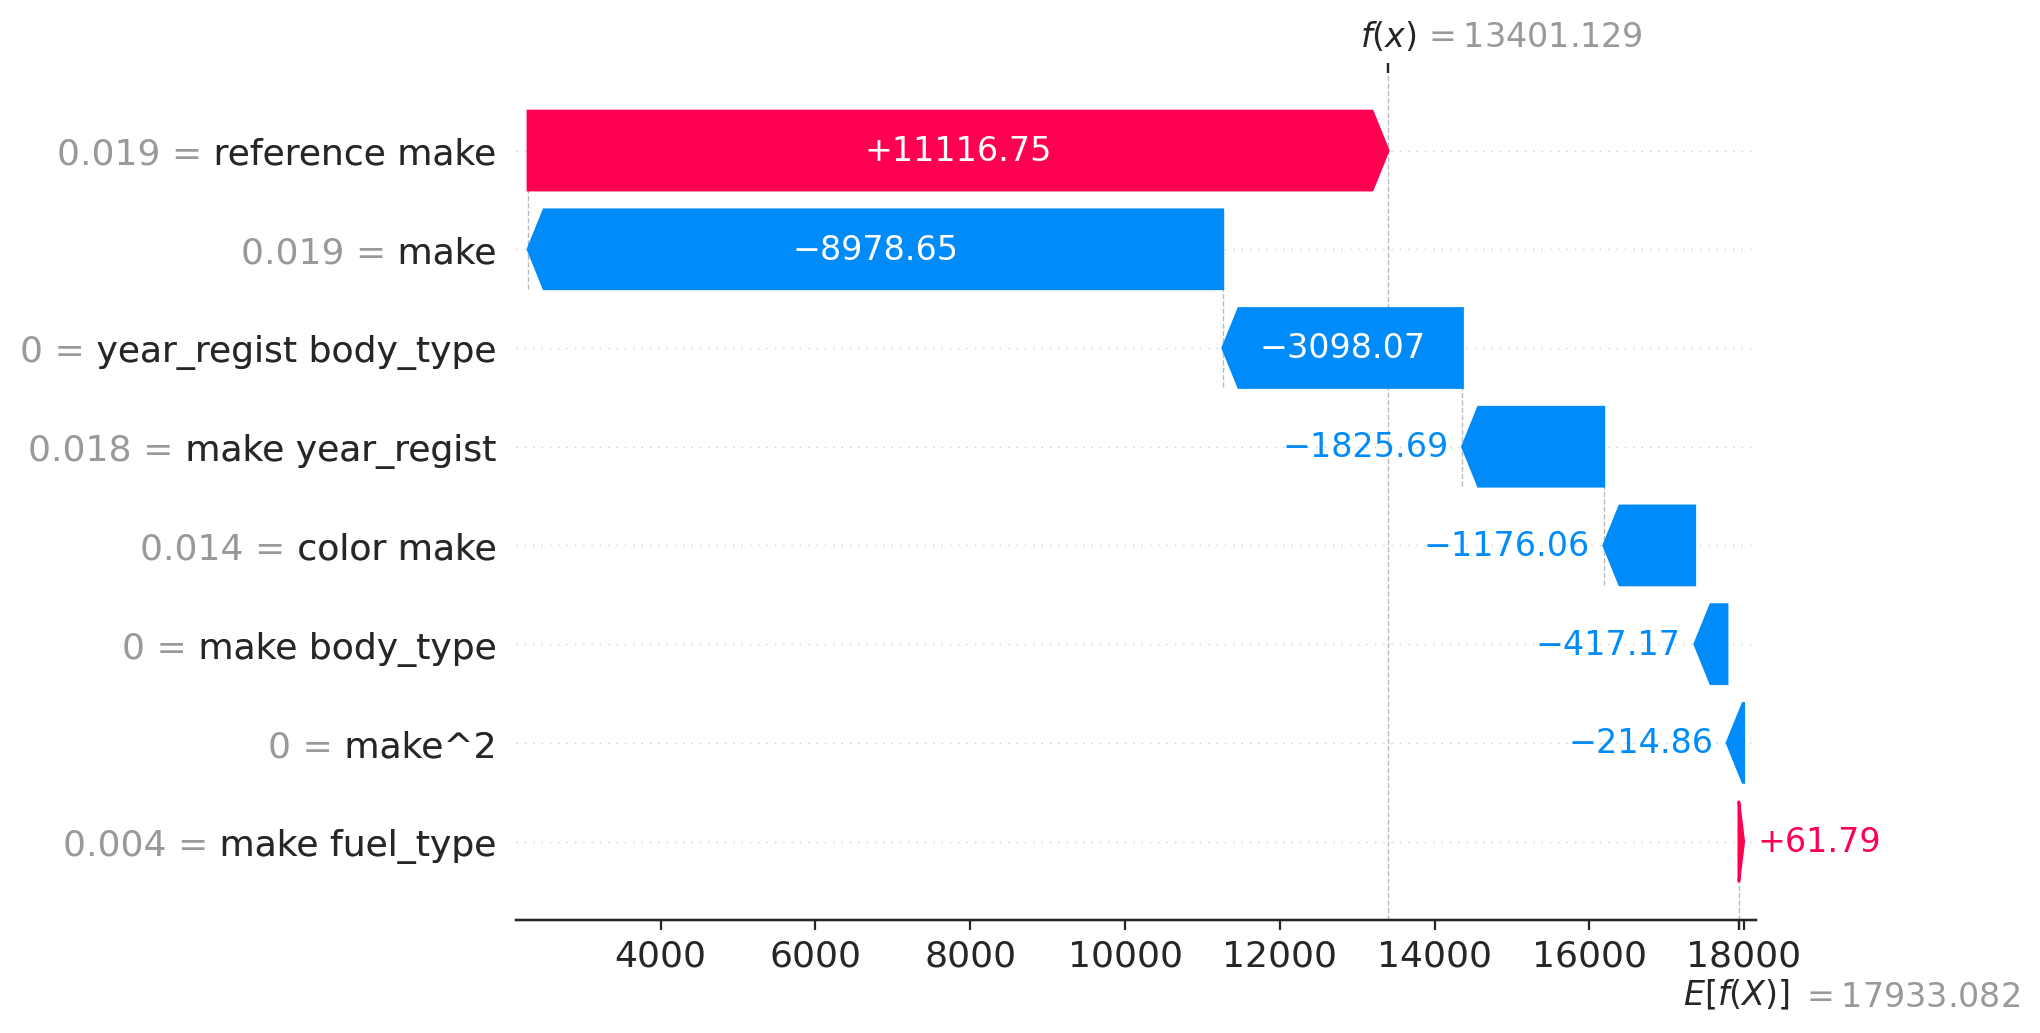

In [445]:
shap.plots.waterfall(shap_values[0])

# Random forest Regressor

In [446]:
from sklearn.ensemble import RandomForestRegressor

In [447]:
rfc = RandomForestRegressor(random_state=42)

In [448]:
param_grid = {'n_estimators': [3,6,7,8],
              'max_depth': [3, 5, 7],
              }


In [449]:
rgc = GridSearchCV(rfc,param_grid,cv=5)

In [450]:
rgc.fit(Strain_features_df,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [3, 6, 7, 8]})

In [451]:

best_params = rgc.best_params_
best_params

{'max_depth': 5, 'n_estimators': 3}

In [452]:
best_estimator_rfc = rgc.best_estimator_
best_estimator_rfc

RandomForestRegressor(max_depth=5, n_estimators=3, random_state=42)

In [453]:
rfc = RandomForestRegressor(max_depth=5, n_estimators=3, random_state = 42)

In [454]:
rfc.fit(Strain_features_df,y_train)

RandomForestRegressor(max_depth=5, n_estimators=3, random_state=42)

## evaluating model performance

In [455]:
rfc.score(Strain_features_df,y_train),rfc.score(Stest_features_df,y_test)

(0.6287323276280135, 0.11268999163646631)

In [456]:
from sklearn.metrics import mean_absolute_error

In [457]:

mean_absolute_error(y_train,rfc.predict(Strain_features_df))

6116.470834619533

In [458]:
mean_absolute_error(y_test,rfc.predict(Stest_features_df))

6548.961641236213

In [459]:
feature_importances = rfc.feature_importances_

In [460]:
indices = np.argsort(feature_importances)

In [461]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(Strain_features_df.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(Strain_features_df.shape[1]), Strain_features_df.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

#residuals

In [462]:

true_value=y_test.iloc[13]
true_value

9495

In [463]:
# Select the specific sample from the NumPy array
sample = Stest_features_df.iloc[[8]]
predicted_value = rfc.predict(sample)
predicted_value


array([75198.06519208])

In [464]:
predicted_value-true_value

array([65703.06519208])

In [465]:
y_pred = rfc.predict(Stest_features_df)

In [466]:
y_test.head().to_numpy()

array([19845, 16000, 21000, 42979, 14999])

In [467]:
(y_pred - y_test).head(10)

281974    -8053.623543
344202    -4208.623543
394542    11239.143686
380593   -14482.253431
387018     2835.290487
365199     4812.751342
207029     8623.360771
24081      7584.290487
331504     7348.065192
304642     1779.331461
Name: price, dtype: float64

In [468]:

np.mean(np.abs(y_pred - y_test))

6548.961641236213

#Actual vs predicted

In [469]:
PredictionErrorDisplay.from_estimator(
    rfc, Strain_features_df, y_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5));



In [470]:
PredictionErrorDisplay.from_estimator(
    rfc, Stest_features_df, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

# Shap RFC

In [471]:
!pip install --upgrade shap==0.44.1 -q
import shap
shap.initjs()

In [472]:
explainer = shap.TreeExplainer(rfc, Strain_features_df)
explainer

In [473]:
explanations = explainer(Stest_features_df)

In [474]:
type(explanations)

shap._explanation.Explanation

In [475]:
explanations.shape

(93040, 8)

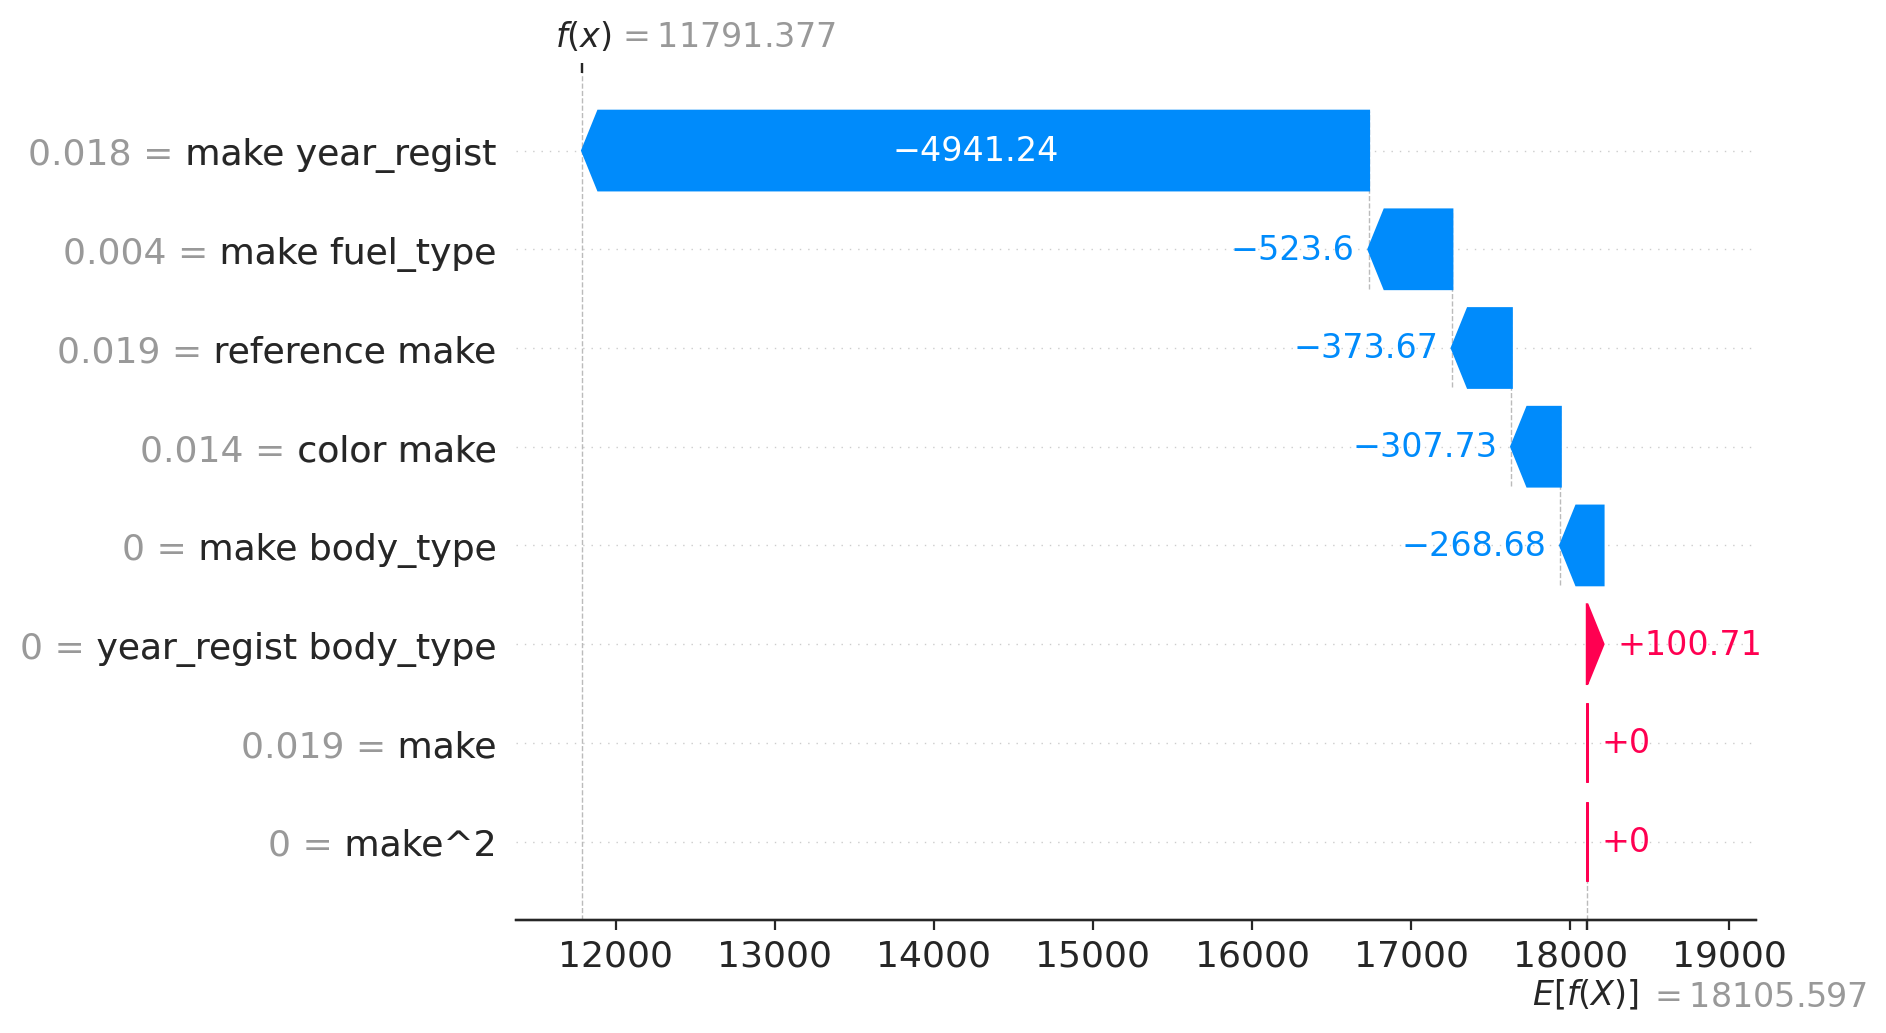

In [476]:
shap.plots.waterfall(explanations[0])

# Boosted Tree Regressor

In [477]:
from sklearn.ensemble import GradientBoostingRegressor

In [478]:
boosted_tree = GradientBoostingRegressor(random_state=42)

In [479]:
param_grid = {'n_estimators': [2,4,6,8],
              'max_depth':[3,5,7]}


In [480]:
btg = GridSearchCV(boosted_tree,param_grid,cv=5)

In [481]:
btg.fit(Strain_features_df,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [2, 4, 6, 8]})

In [482]:
best_estimator =btg.best_estimator_

In [483]:
btg.best_params_

{'max_depth': 5, 'n_estimators': 8}

In [484]:
boosted_tree = GradientBoostingRegressor(max_depth=5 ,n_estimators = 8, random_state=42 )

In [485]:
boosted_tree.fit(Strain_features_df,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=8, random_state=42)

In [486]:
mean_absolute_error(y_train,boosted_tree.predict(Strain_features_df))

7055.440561553362

In [487]:
mean_absolute_error(y_test,boosted_tree.predict(Stest_features_df))

7500.896353546801

In [488]:
feature_importances = boosted_tree.feature_importances_

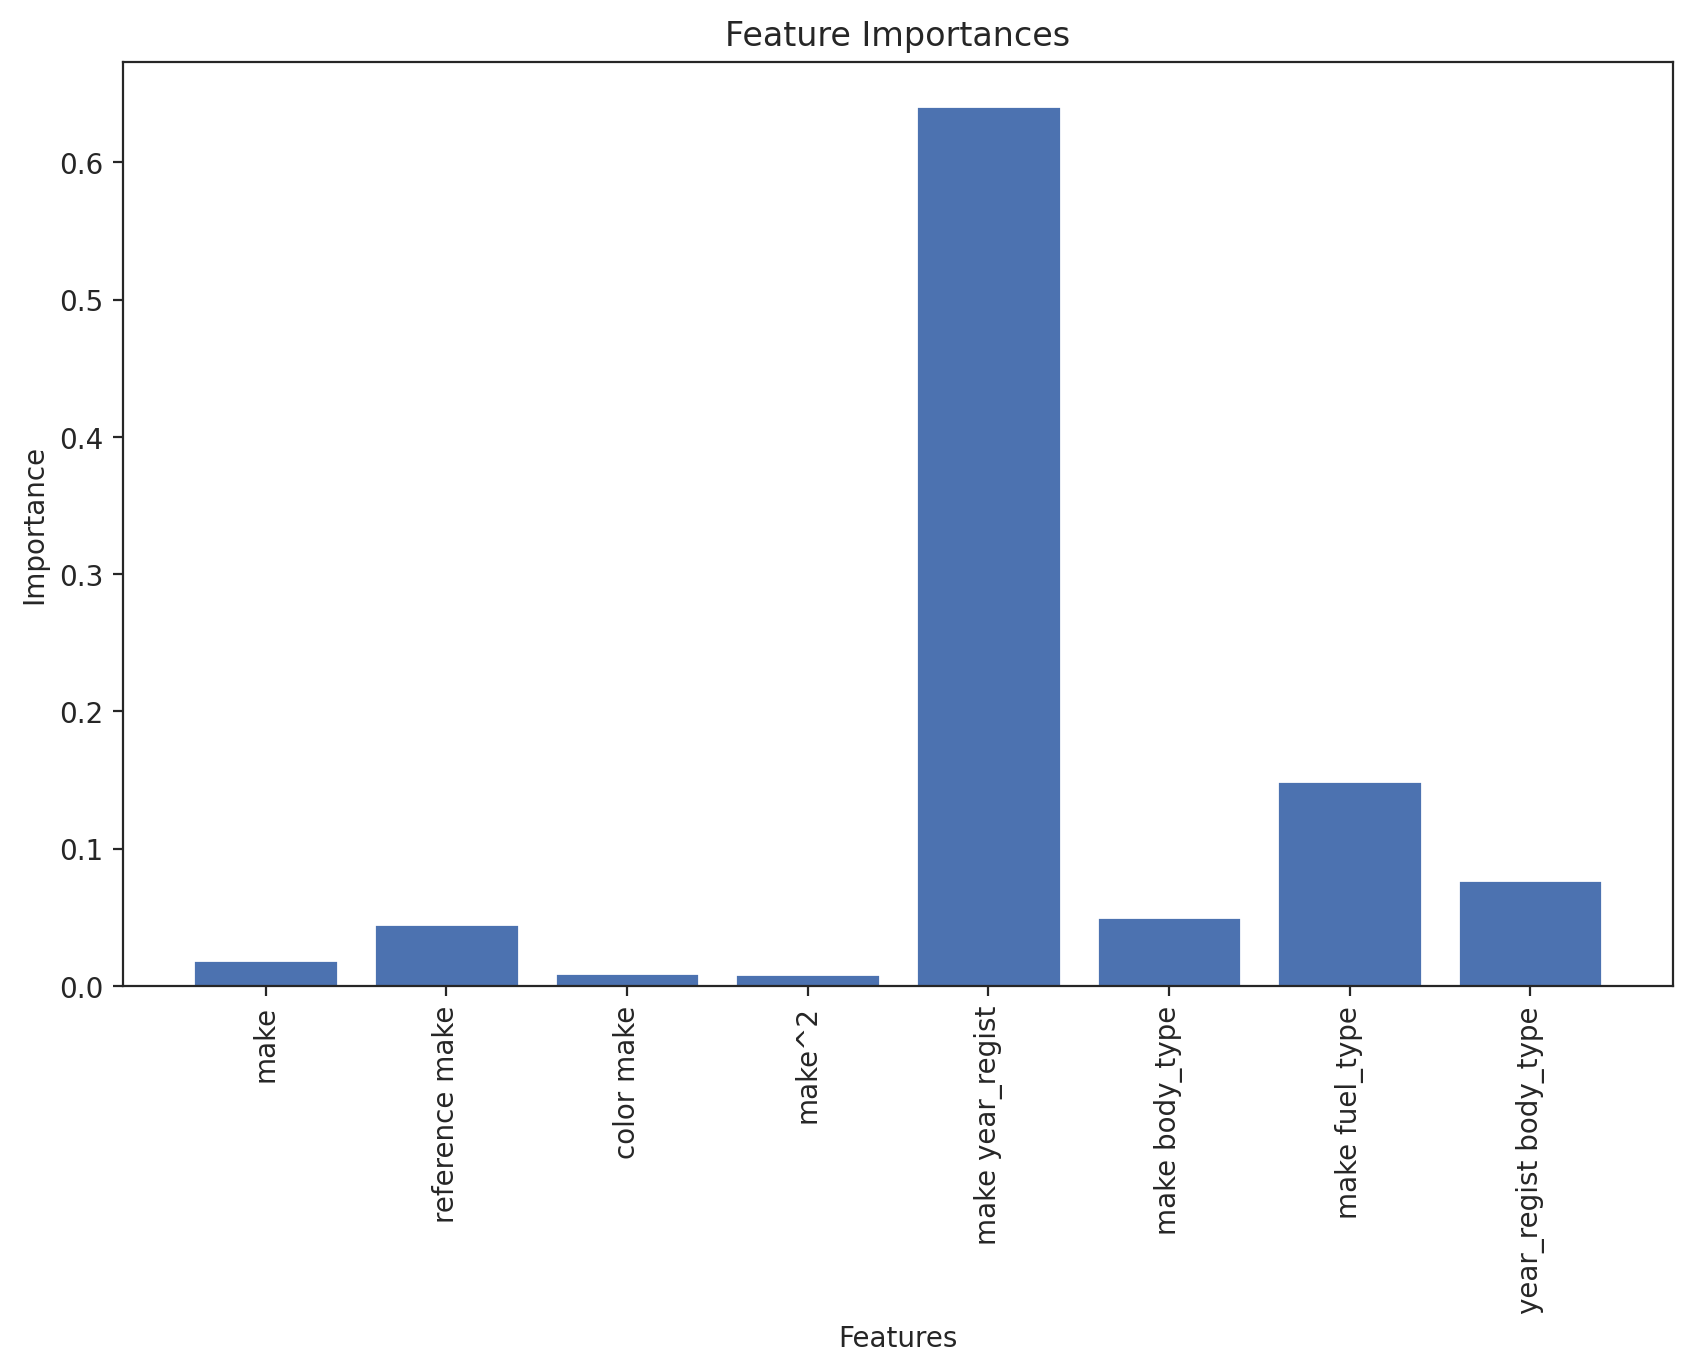

In [489]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(Strain_features_df.shape[1]), feature_importances, align="center")
plt.xticks(range(Strain_features_df.shape[1]), Strain_features_df.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

residuals

In [490]:
true = y_test.iloc[12]
true

10300

In [491]:
# Select the specific sample from the NumPy array
sample = Stest_features_df.iloc[[8]]
predicted_value = boosted_tree.predict(sample)
predicted_value


array([45024.43975025])

In [492]:
predicted_value-true_value

array([35529.43975025])

In [493]:
y_pred = boosted_tree.predict(Stest_features_df)

In [494]:
y_test.head().to_numpy()

array([19845, 16000, 21000, 42979, 14999])

In [495]:
(y_pred - y_test).head(10)

281974    -5160.376555
344202    -1647.745339
394542     6366.793069
380593   -20733.217864
387018     2456.483661
365199     4528.741077
207029     3736.882642
24081      7205.483661
331504   -22825.560250
304642     7885.373501
Name: price, dtype: float64

In [496]:
np.mean(np.abs(y_pred - y_test))

7500.896353546801

#Actual vs predicted

In [ ]:
PredictionErrorDisplay.from_estimator(
    boosted_tree,Strain_features_df, y_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [ ]:
PredictionErrorDisplay.from_estimator(
    boosted_tree,Stest_features_df, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
    );



# shap boosted tree

In [499]:
explainer_bg = shap.TreeExplainer(boosted_tree,Strain_features_df)
explainer_bg

In [500]:
shap_values_bg = explainer_bg(Stest_features_df)

 96%|=================== | 89225/93040 [00:15<00:00]       

In [501]:
shap_values_bg.shape

(93040, 8)

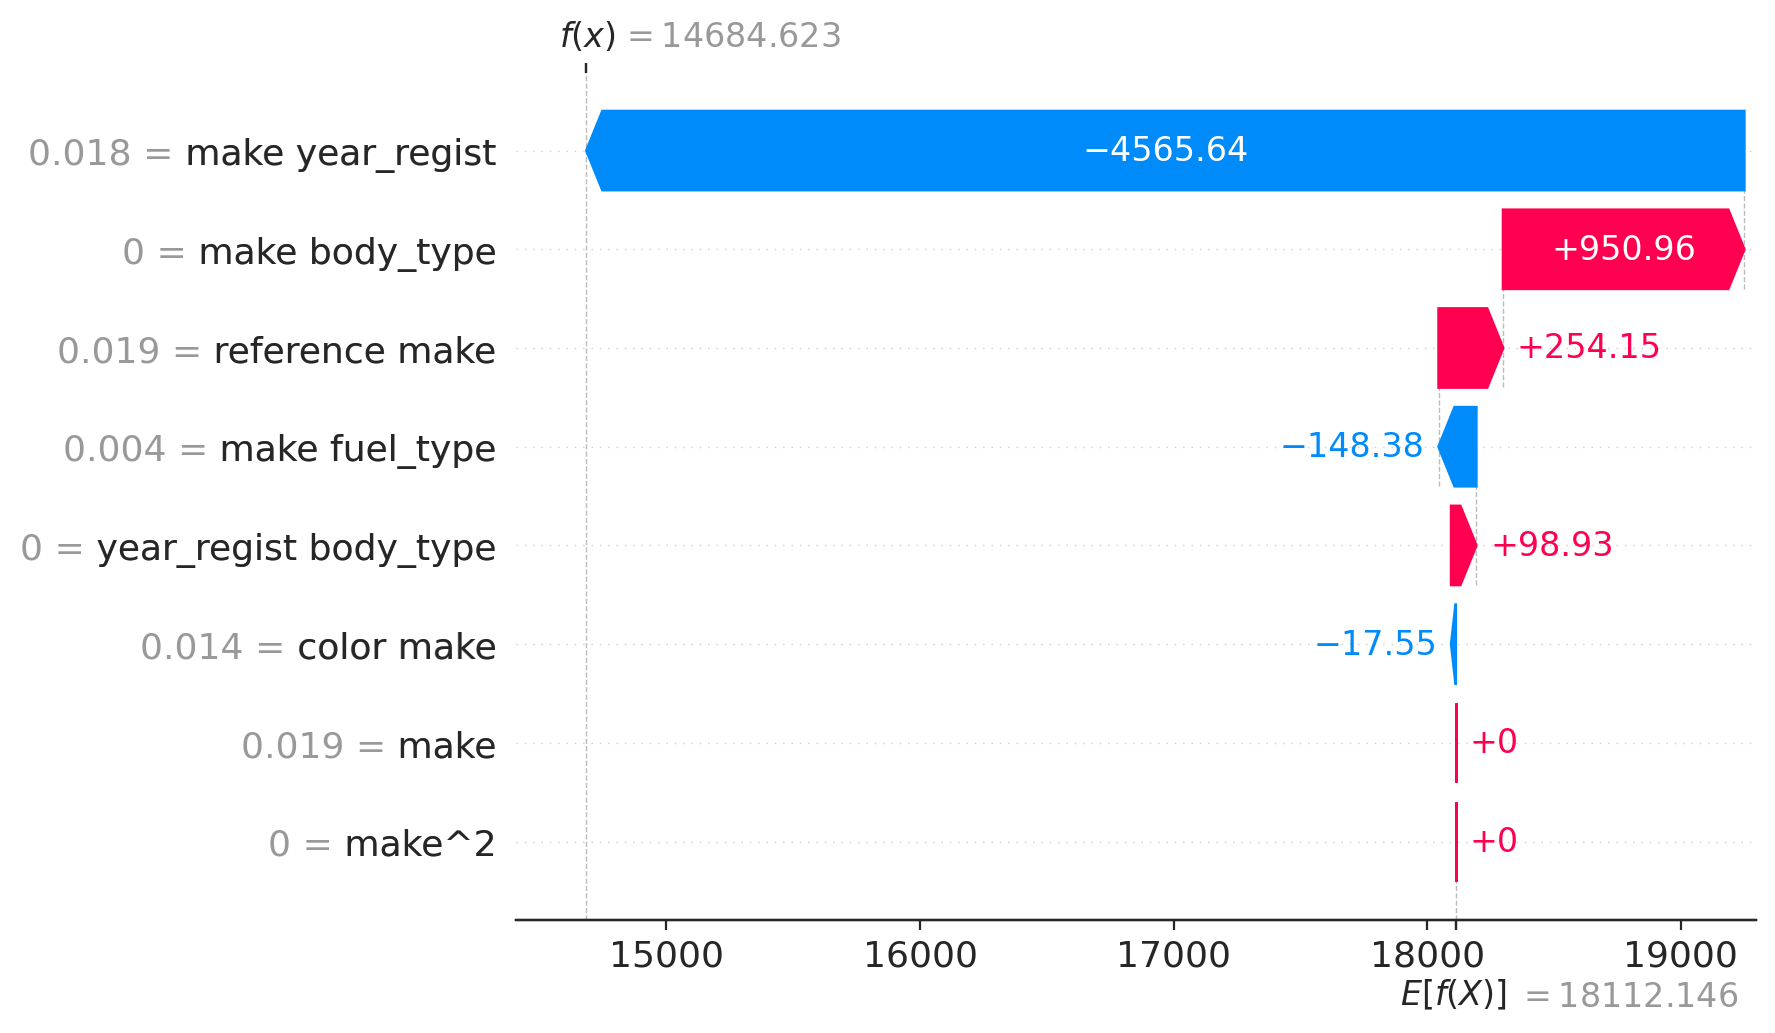

In [502]:
shap.plots.waterfall(shap_values_bg[0])

# Voting Ensemble

In [503]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor




In [504]:
from sklearn.ensemble import VotingRegressor

In [505]:
my_models = [lrr,rfc,boosted_tree]
model_results_list = []
for my_model in my_models:
    eval_results = cross_validate(
        my_model, X, y, cv=5,
        scoring='neg_mean_absolute_error',
        return_train_score=True
    )
    model_results_list.append(
        (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
         -eval_results['train_score'].mean(), eval_results['train_score'].std())
    )

In [506]:
model_results = pd.DataFrame(
    model_results_list,
    columns=['test_mae_mean', 'test_mae_std', 'train_mae_mean', 'train_mae_std'],
    index=['lrr', 'rfc', 'boosted_tree']
)

In [507]:
ensemble = VotingRegressor(
    [
        ("gb", boosted_tree),
        ("rf", rfc),
        ('lr', lrr)
    ]
)
ensemble.fit(Strain_features_df, y_train)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=8,
                                                       random_state=42)),
                            ('rf',
                             RandomForestRegressor(max_depth=5, n_estimators=3,
                                                   random_state=42)),
                            ('lr', LinearRegression())])

In [508]:
eval_results = cross_validate(
    ensemble, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
ensemble_result = (
    -eval_results['test_score'].mean(), eval_results['test_score'].std(),
    -eval_results['train_score'].mean(), eval_results['train_score'].std()
)

In [509]:
model_results.loc['ensemble'] = ensemble_result

In [510]:
model_results

test_mae_mean  test_mae_std  train_mae_mean  train_mae_std
lrr             6050.059995     99.655944     6049.373275      63.126755
rfc             5809.533286    248.973016     5668.769466      43.426818
boosted_tree    6661.690549    123.394643     6593.835719      37.271104
ensemble        5241.059323    156.387701     5178.130616      24.869931

In [511]:
xt = Strain_features_df.head(20)
yt = Stest_features_df.head(20)
pred_gb = boosted_tree.predict(xt)
pred_rf = rfc.predict(xt)
pred_lr = lrr.predict(xt)
pred_ens = ensemble.predict(xt)

In [512]:
print("Number of features in xt:", xt.shape[1])

Number of features in xt: 8


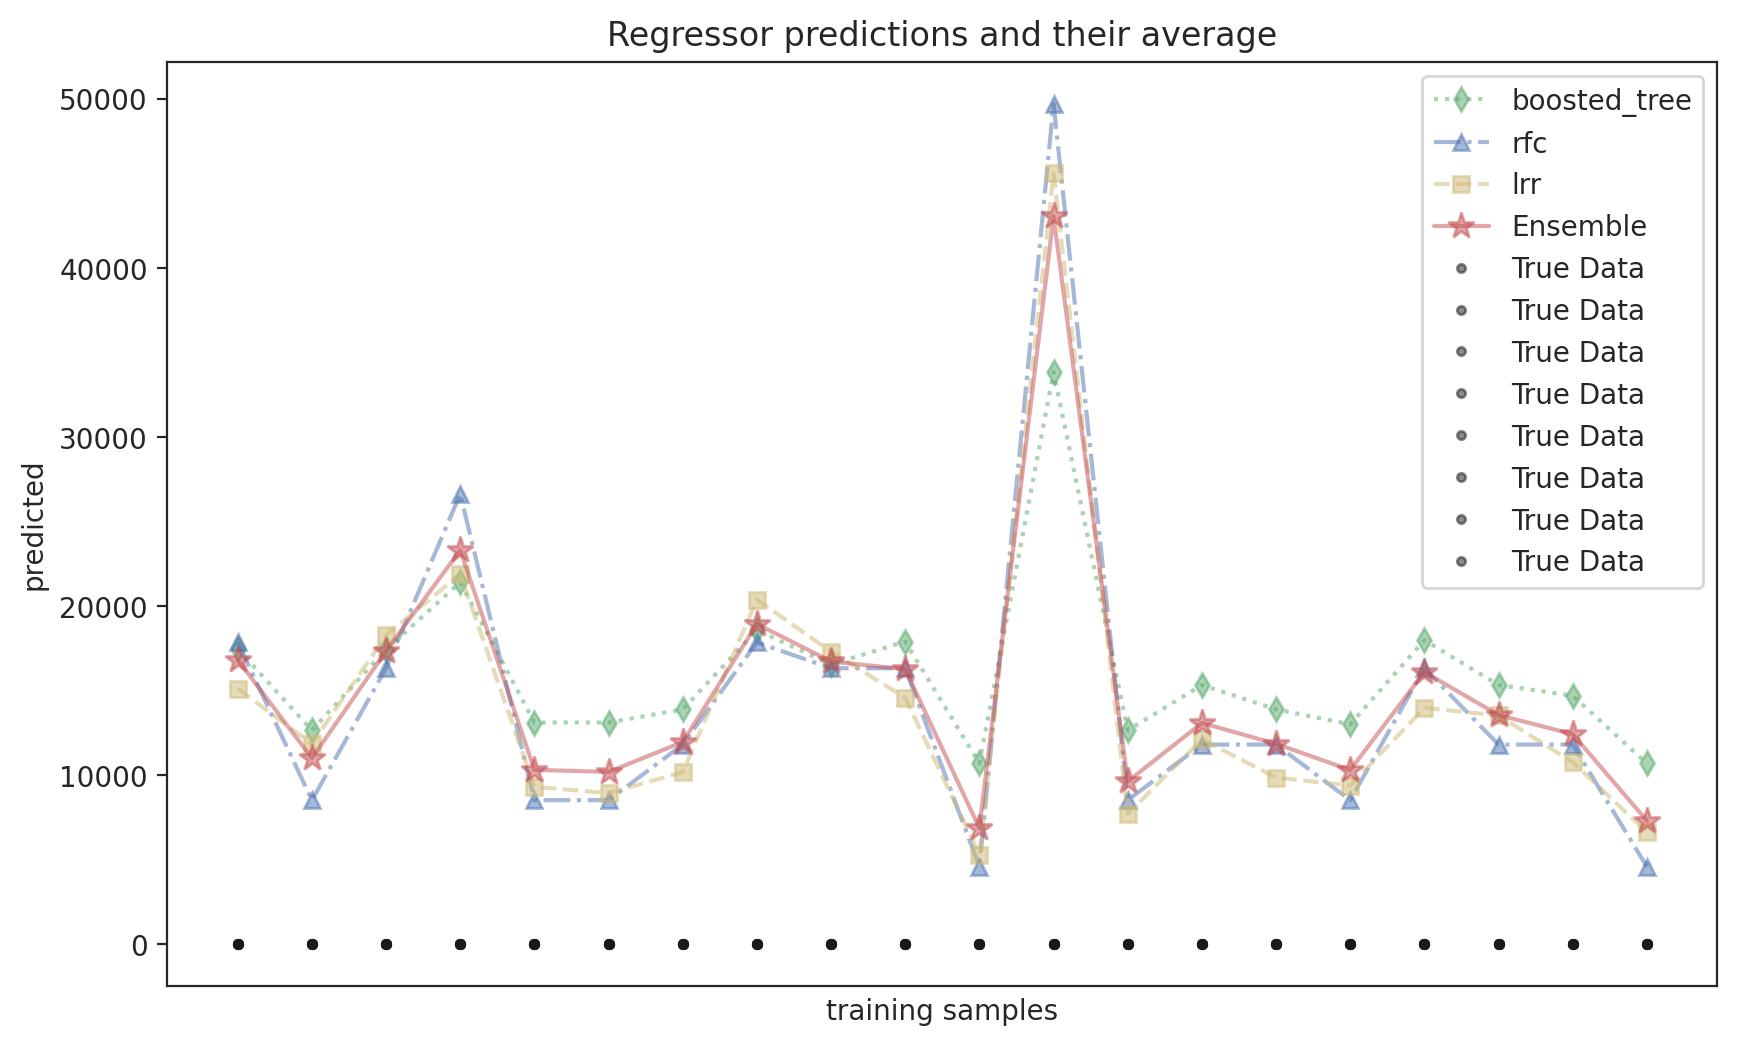

In [513]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pred_gb, "gd:", alpha=0.5, label="boosted_tree")
ax.plot(pred_rf, "b^-.", alpha=0.5, label="rfc")
ax.plot(pred_lr, "ys--", alpha=0.5, label="lrr")
ax.plot(pred_ens, "r*-", alpha=0.5, ms=10, label="Ensemble")
ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions and their average");
plt.savefig("votingensembleplot")

# Overall performance performance with Cross validation

In [514]:
Regressor = {
    "Linear Regression": lrr,
    "Random Forest": rfc,
    "Gradient Boosting": boosted_tree
}

In [515]:
cv_results = {}
for model_name, model in Regressor.items():
    cv_results[model_name] = cross_validate(model, Strain_features_df, y_train, cv=5,
                                             scoring='neg_mean_absolute_error', return_train_score=True)


In [516]:
#results = pd.DataFrame(columns=['Model', 'Test MAE Mean', 'Test MAE Std', 'Train MAE Mean', 'Train MAE Std'])

In [517]:
results_list = []

In [518]:
for model_name, result in cv_results.items():
    test_mae_mean = -result['test_score'].mean()
    test_mae_std = result['test_score'].std()
    train_mae_mean = -result['train_score'].mean()
    train_mae_std = result['train_score'].std()

    new_data = {
        'Model': model_name,
        'Test MAE Mean': test_mae_mean,
        'Test MAE Std': test_mae_std,
        'Train MAE Mean': train_mae_mean,
        'Train MAE Std': train_mae_std
    }

    results_list.append(new_data)

results = pd.DataFrame(results_list)

In [519]:
results

Model  Test MAE Mean  Test MAE Std  Train MAE Mean  \
0  Linear Regression    6369.840259     72.501531     6364.079489   
1      Random Forest    6131.027890     62.383740     6101.723030   
2  Gradient Boosting    7077.318069     56.281163     7050.888417   

   Train MAE Std  
0      28.221071  
1      47.870801  
2      36.463765

# Global and Explanations with Shap

# Partial Dependency plots

In [528]:
Stest_features_df.columns

Index(['make', 'reference make', 'color make', 'make^2', 'make year_regist',
       'make body_type', 'make fuel_type', 'year_regist body_type'],
      dtype='object')

In [529]:
from sklearn.inspection import PartialDependenceDisplay

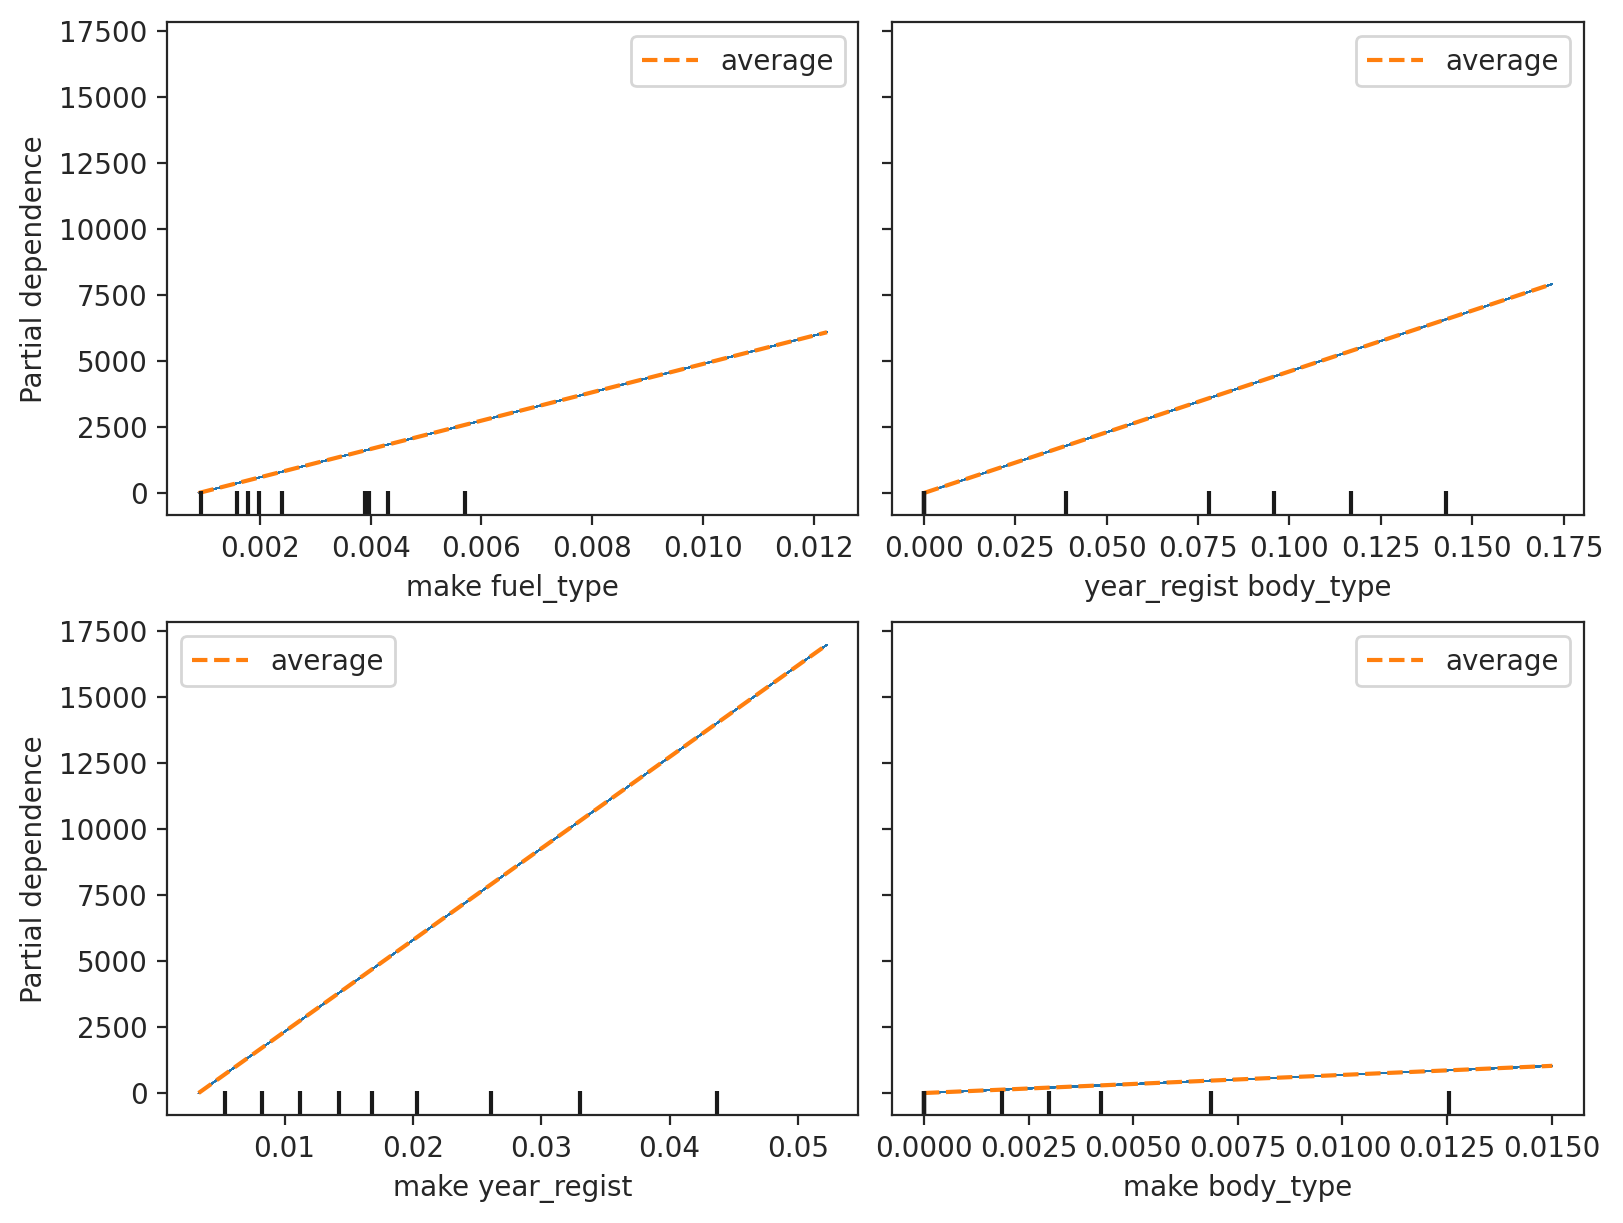

In [530]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    lrr, Stest_features_df, features=['make fuel_type','year_regist body_type', 'make year_regist',
       'make body_type'],
    kind='both', centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

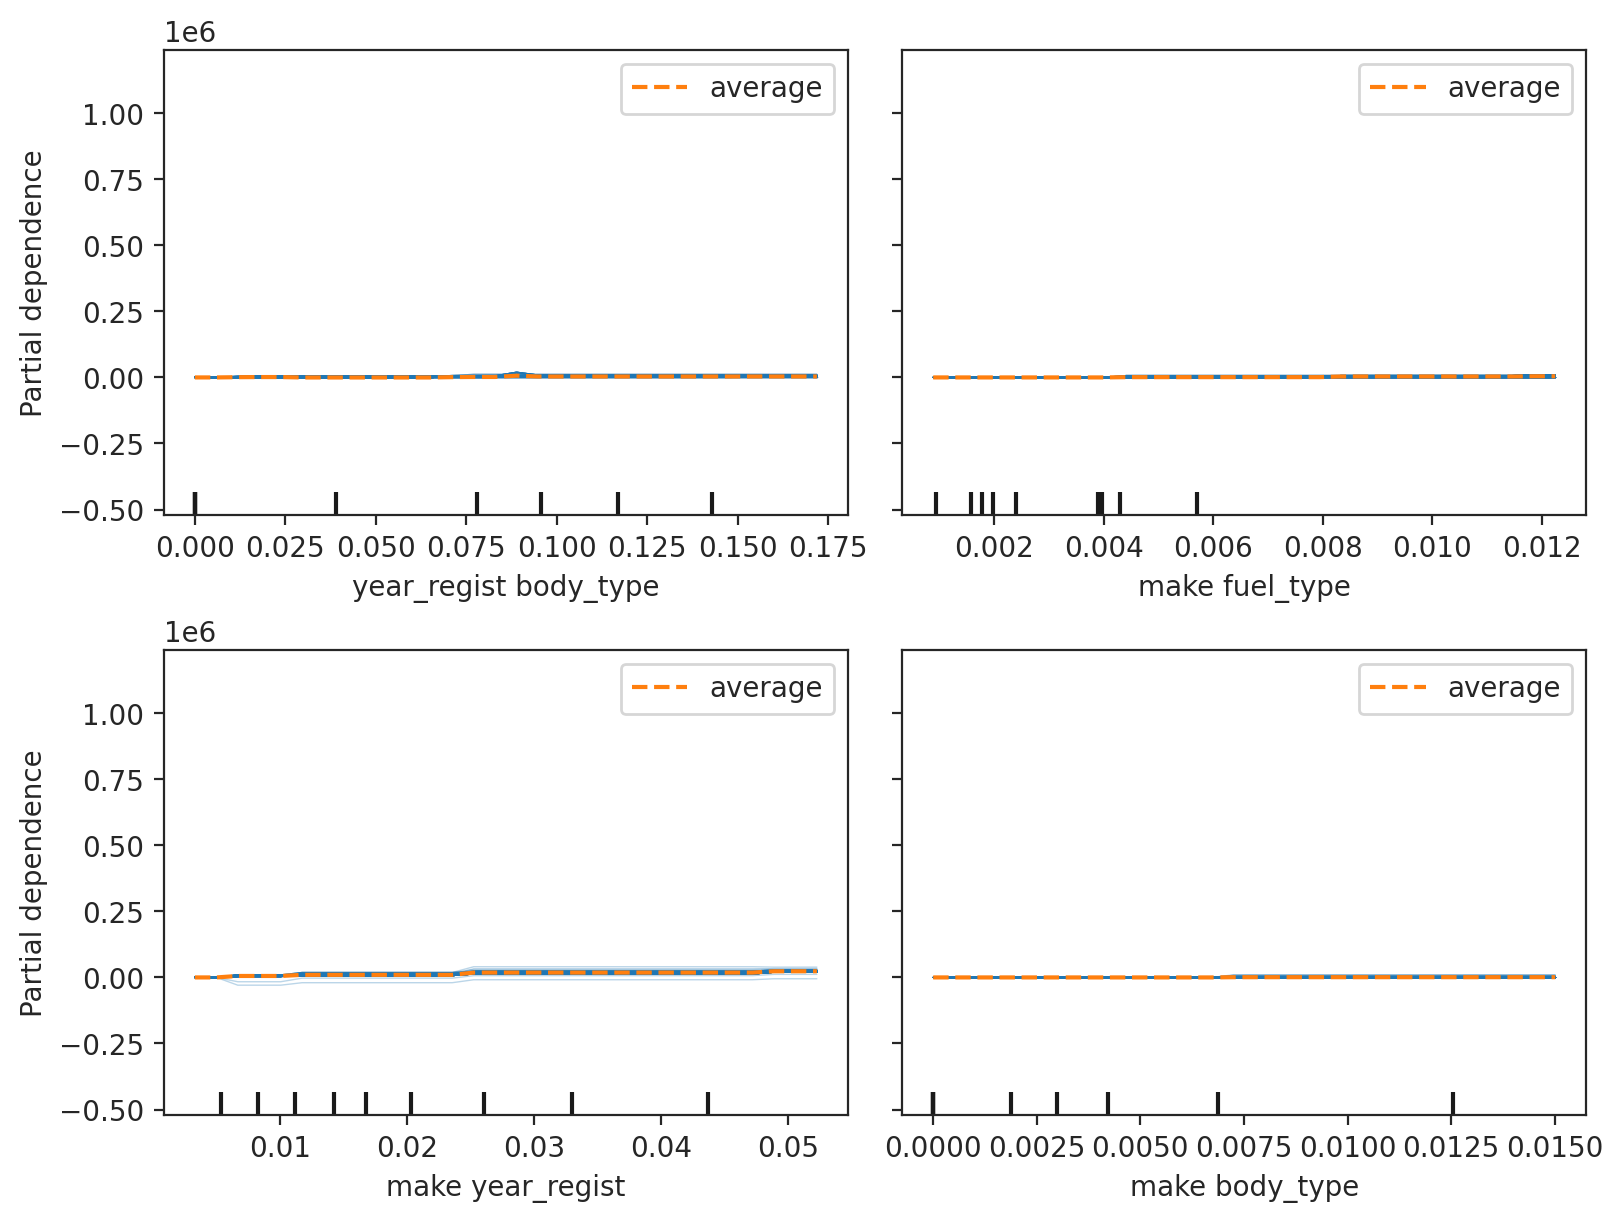

In [531]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rfc, Stest_features_df, features=['year_regist body_type','make fuel_type', 'make year_regist',
       'make body_type'],
    kind='both', centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

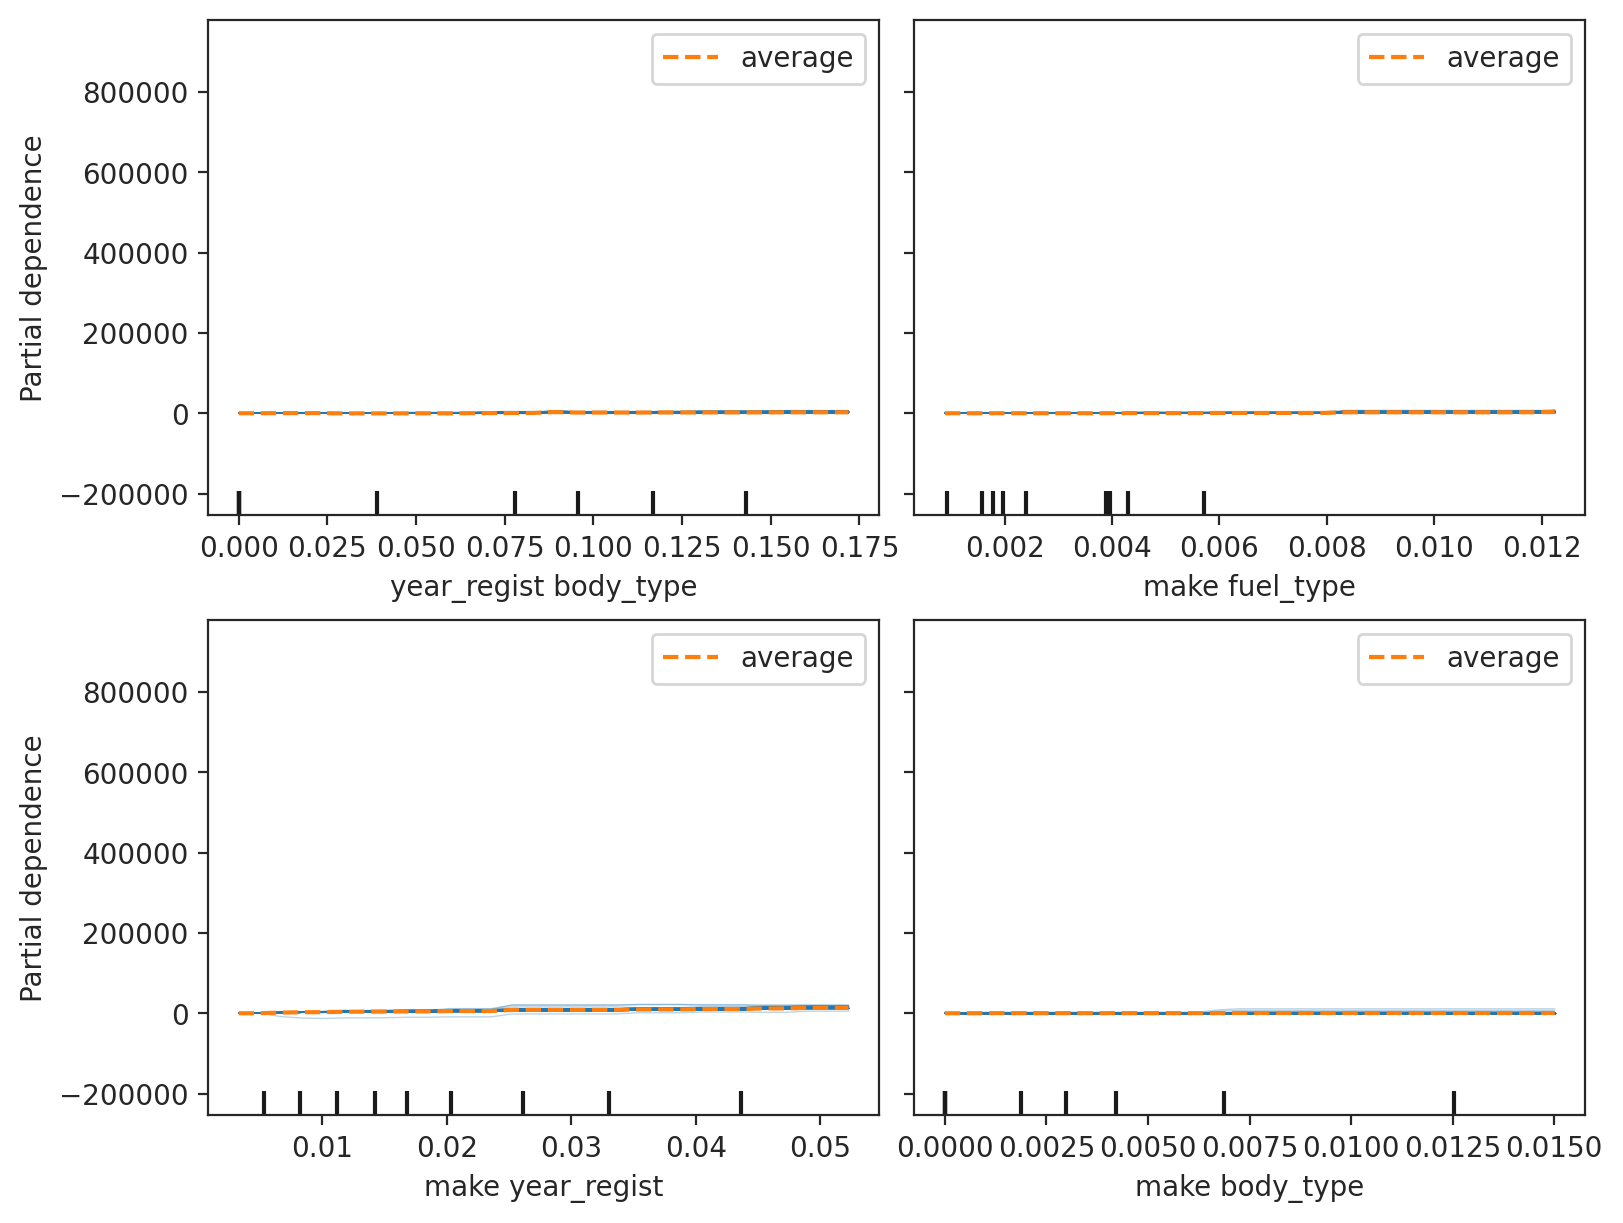

In [532]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    boosted_tree, Stest_features_df, features=['year_regist body_type', 'make fuel_type', 'make year_regist',
       'make body_type'],
    kind='both', centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

In [533]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rfc, Stest_features_df, features=['year_regist body_type', 'make fuel_type', 'make year_regist',
       'make body_type'],
    kind='average',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);
plt.savefig("PDPrfc")

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    lrr, Stest_features_df, features=['year_regist body_type', 'make fuel_type', 'make year_regist',
       'make body_type'],
    kind='average',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);
plt.savefig("PDPlrr")

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    boosted_tree, Stest_features_df, features=['year_regist body_type', 'make fuel_type', 'make year_regist',
       'make body_type'],
    kind='average',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);
plt.savefig("PDPbtg")